In [1]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [2]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
chihuahua_dir = './Images/n02085620-Chihuahua'
japanese_spaniel_dir = './Images/n02085782-Japanese_spaniel'
maltese_dir = './Images/n02085936-Maltese_dog'
pekinese_dir = './Images/n02086079-Pekinese'
shitzu_dir = './Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = './Images/n02086646-Blenheim_spaniel'
papillon_dir = './Images/n02086910-papillon'
toy_terrier_dir = './Images/n02087046-toy_terrier'
afghan_hound_dir = './Images/n02088094-Afghan_hound'
basset_dir = './Images/n02088238-basset'


X = []
Z = []
imgsize = 150

In [5]:
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:00<00:00, 355.05it/s]


In [6]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [7]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

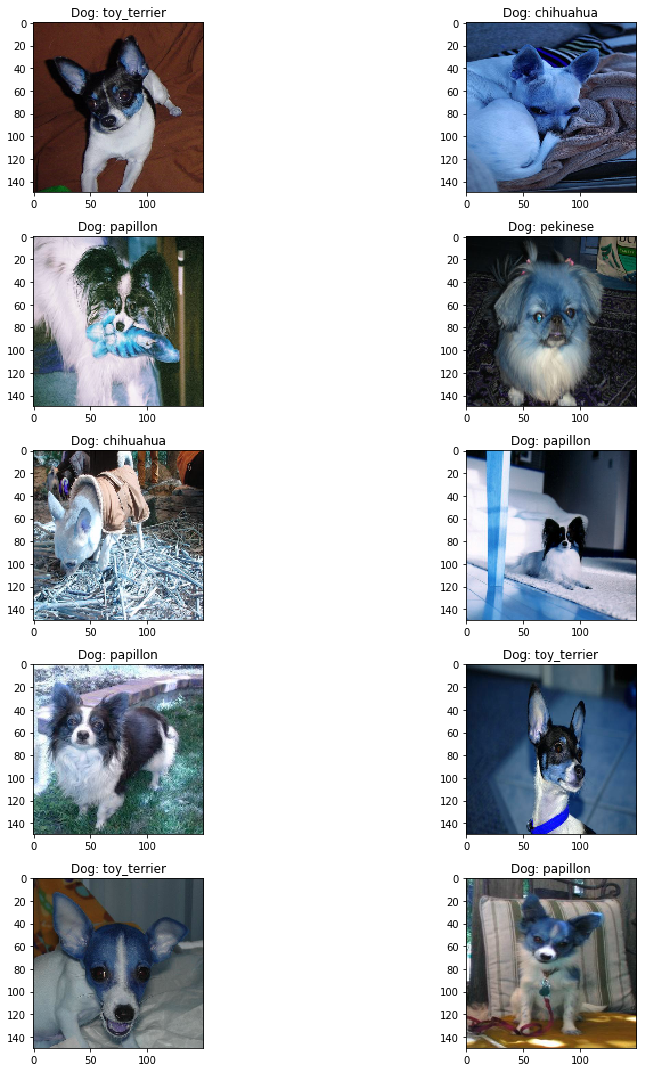

In [8]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [9]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) #, expand_nested=True)

Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x000001A31A2895F8> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A298DD8> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A289F28> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A31A2D08D0> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A2D0C88> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A62D9B0> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A31A648160> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A65FF28> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A679E10> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A6A86A0> False
<keras.layers.pooling.MaxPooling2D object at 0x000001A31A1962B0> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A6C1CF8> False
<keras.layers.convolutional.Conv2D object at 0x000001A31A6F1908> False
<ke

In [10]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [11]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),
    validation_steps = 1000,
    steps_per_epoch  = 1000,
    epochs = 20, 
    verbose = 1,
    callbacks=callbacks
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20


 204/1000 [=====>........................] - ETA: 40:32 - loss: 2.6883 - acc: 0.12 - ETA: 36:20 - loss: 2.7479 - acc: 0.15 - ETA: 34:43 - loss: 2.9002 - acc: 0.12 - ETA: 33:54 - loss: 2.9251 - acc: 0.09 - ETA: 33:49 - loss: 2.9569 - acc: 0.07 - ETA: 33:38 - loss: 2.8724 - acc: 0.07 - ETA: 33:33 - loss: 2.8349 - acc: 0.07 - ETA: 33:42 - loss: 2.8086 - acc: 0.07 - ETA: 33:25 - loss: 2.7570 - acc: 0.08 - ETA: 33:11 - loss: 2.7558 - acc: 0.07 - ETA: 33:03 - loss: 2.7162 - acc: 0.08 - ETA: 32:56 - loss: 2.6833 - acc: 0.08 - ETA: 32:49 - loss: 2.6615 - acc: 0.09 - ETA: 32:43 - loss: 2.6668 - acc: 0.08 - ETA: 32:37 - loss: 2.6516 - acc: 0.09 - ETA: 32:44 - loss: 2.6369 - acc: 0.08 - ETA: 32:38 - loss: 2.6295 - acc: 0.09 - ETA: 32:33 - loss: 2.6188 - acc: 0.09 - ETA: 32:26 - loss: 2.6110 - acc: 0.08 - ETA: 32:22 - loss: 2.6094 - acc: 0.08 - ETA: 32:16 - loss: 2.5822 - acc: 0.09 - ETA: 32:10 - loss: 2.5637 - acc: 0.10 - ETA: 32:04 - loss: 2.5635 - acc: 0.10 - ETA: 32:00 - loss: 2.5591 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:27 - loss: 2.2275 - acc: 0.20 - ETA: 25:25 - loss: 2.2255 - acc: 0.21 - ETA: 25:23 - loss: 2.2245 - acc: 0.21 - ETA: 25:21 - loss: 2.2224 - acc: 0.21 - ETA: 25:19 - loss: 2.2219 - acc: 0.21 - ETA: 25:17 - loss: 2.2198 - acc: 0.21 - ETA: 25:15 - loss: 2.2181 - acc: 0.21 - ETA: 25:13 - loss: 2.2161 - acc: 0.21 - ETA: 25:11 - loss: 2.2143 - acc: 0.21 - ETA: 25:09 - loss: 2.2137 - acc: 0.21 - ETA: 25:07 - loss: 2.2133 - acc: 0.21 - ETA: 25:05 - loss: 2.2117 - acc: 0.21 - ETA: 25:03 - loss: 2.2111 - acc: 0.21 - ETA: 25:01 - loss: 2.2105 - acc: 0.21 - ETA: 24:59 - loss: 2.2090 - acc: 0.21 - ETA: 24:57 - loss: 2.2085 - acc: 0.22 - ETA: 24:55 - loss: 2.2080 - acc: 0.22 - ETA: 24:53 - loss: 2.2075 - acc: 0.22 - ETA: 24:51 - loss: 2.2062 - acc: 0.22 - ETA: 24:49 - loss: 2.2056 - acc: 0.22 - ETA: 24:48 - loss: 2.2044 - acc: 0.22 - ETA: 24:46 - loss: 2.2037 - acc: 0.22 - ETA: 24:44 - loss: 2.2030 - acc: 0.22 - ETA: 24:42 - loss: 2.2014 - acc: 0.

 612/1000 [=================>............] - ETA: 19:11 - loss: 2.0603 - acc: 0.28 - ETA: 19:09 - loss: 2.0601 - acc: 0.28 - ETA: 19:07 - loss: 2.0597 - acc: 0.28 - ETA: 19:05 - loss: 2.0590 - acc: 0.28 - ETA: 19:03 - loss: 2.0582 - acc: 0.28 - ETA: 19:01 - loss: 2.0576 - acc: 0.28 - ETA: 18:59 - loss: 2.0569 - acc: 0.28 - ETA: 18:57 - loss: 2.0557 - acc: 0.29 - ETA: 18:55 - loss: 2.0546 - acc: 0.29 - ETA: 18:53 - loss: 2.0546 - acc: 0.29 - ETA: 18:52 - loss: 2.0543 - acc: 0.29 - ETA: 18:49 - loss: 2.0538 - acc: 0.29 - ETA: 18:47 - loss: 2.0538 - acc: 0.29 - ETA: 18:45 - loss: 2.0532 - acc: 0.29 - ETA: 18:43 - loss: 2.0522 - acc: 0.29 - ETA: 18:41 - loss: 2.0520 - acc: 0.29 - ETA: 18:37 - loss: 2.0489 - acc: 0.29 - ETA: 18:35 - loss: 2.0479 - acc: 0.29 - ETA: 18:33 - loss: 2.0469 - acc: 0.29 - ETA: 18:31 - loss: 2.0462 - acc: 0.29 - ETA: 18:29 - loss: 2.0458 - acc: 0.29 - ETA: 18:27 - loss: 2.0453 - acc: 0.29 - ETA: 18:25 - loss: 2.0449 - acc: 0.29 - ETA: 18:23 - loss: 2.0443 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:26 - loss: 1.9418 - acc: 0.34 - ETA: 12:24 - loss: 1.9409 - acc: 0.34 - ETA: 12:22 - loss: 1.9402 - acc: 0.34 - ETA: 12:20 - loss: 1.9398 - acc: 0.34 - ETA: 12:18 - loss: 1.9395 - acc: 0.34 - ETA: 12:16 - loss: 1.9388 - acc: 0.34 - ETA: 12:14 - loss: 1.9384 - acc: 0.34 - ETA: 12:13 - loss: 1.9383 - acc: 0.34 - ETA: 12:11 - loss: 1.9382 - acc: 0.34 - ETA: 12:09 - loss: 1.9377 - acc: 0.34 - ETA: 12:07 - loss: 1.9373 - acc: 0.34 - ETA: 12:05 - loss: 1.9370 - acc: 0.34 - ETA: 12:03 - loss: 1.9369 - acc: 0.34 - ETA: 12:01 - loss: 1.9363 - acc: 0.34 - ETA: 11:59 - loss: 1.9355 - acc: 0.34 - ETA: 11:57 - loss: 1.9351 - acc: 0.34 - ETA: 11:55 - loss: 1.9347 - acc: 0.34 - ETA: 11:53 - loss: 1.9343 - acc: 0.34 - ETA: 11:51 - loss: 1.9342 - acc: 0.34 - ETA: 11:49 - loss: 1.9338 - acc: 0.34 - ETA: 11:47 - loss: 1.9336 - acc: 0.34 - ETA: 11:46 - loss: 1.9335 - acc: 0.34 - ETA: 11:44 - loss: 1.9330 - acc: 0.34 - ETA: 11:42 - loss: 1.9331 - acc: 0.

1000/1000 [==============================] - ETA: 5:51 - loss: 1.8574 - acc: 0.379 - ETA: 5:49 - loss: 1.8575 - acc: 0.378 - ETA: 5:47 - loss: 1.8574 - acc: 0.378 - ETA: 5:45 - loss: 1.8573 - acc: 0.378 - ETA: 5:43 - loss: 1.8570 - acc: 0.379 - ETA: 5:42 - loss: 1.8571 - acc: 0.379 - ETA: 5:40 - loss: 1.8563 - acc: 0.379 - ETA: 5:38 - loss: 1.8559 - acc: 0.379 - ETA: 5:36 - loss: 1.8557 - acc: 0.379 - ETA: 5:34 - loss: 1.8551 - acc: 0.380 - ETA: 5:32 - loss: 1.8547 - acc: 0.380 - ETA: 5:30 - loss: 1.8542 - acc: 0.380 - ETA: 5:28 - loss: 1.8541 - acc: 0.380 - ETA: 5:26 - loss: 1.8538 - acc: 0.380 - ETA: 5:24 - loss: 1.8534 - acc: 0.380 - ETA: 5:22 - loss: 1.8529 - acc: 0.380 - ETA: 5:20 - loss: 1.8525 - acc: 0.380 - ETA: 5:18 - loss: 1.8521 - acc: 0.381 - ETA: 5:17 - loss: 1.8517 - acc: 0.381 - ETA: 5:15 - loss: 1.8513 - acc: 0.381 - ETA: 5:13 - loss: 1.8509 - acc: 0.381 - ETA: 5:11 - loss: 1.8505 - acc: 0.381 - ETA: 5:09 - loss: 1.8500 - acc: 0.381 - ETA: 5:07 - loss: 1.8494 - acc: 0.3

 204/1000 [=====>........................] - ETA: 32:11 - loss: 1.6050 - acc: 0.37 - ETA: 31:47 - loss: 1.7291 - acc: 0.37 - ETA: 31:35 - loss: 1.6429 - acc: 0.41 - ETA: 31:30 - loss: 1.5898 - acc: 0.50 - ETA: 31:29 - loss: 1.5982 - acc: 0.43 - ETA: 31:41 - loss: 1.6072 - acc: 0.41 - ETA: 31:37 - loss: 1.6340 - acc: 0.42 - ETA: 31:42 - loss: 1.5686 - acc: 0.45 - ETA: 31:37 - loss: 1.5540 - acc: 0.45 - ETA: 31:33 - loss: 1.5753 - acc: 0.44 - ETA: 31:31 - loss: 1.5690 - acc: 0.46 - ETA: 31:27 - loss: 1.5555 - acc: 0.46 - ETA: 31:24 - loss: 1.5860 - acc: 0.46 - ETA: 31:20 - loss: 1.5487 - acc: 0.48 - ETA: 31:17 - loss: 1.5485 - acc: 0.49 - ETA: 31:20 - loss: 1.5525 - acc: 0.49 - ETA: 31:21 - loss: 1.5460 - acc: 0.50 - ETA: 31:18 - loss: 1.5438 - acc: 0.49 - ETA: 31:14 - loss: 1.5317 - acc: 0.51 - ETA: 29:46 - loss: 1.6192 - acc: 0.48 - ETA: 29:50 - loss: 1.5934 - acc: 0.49 - ETA: 29:50 - loss: 1.6027 - acc: 0.48 - ETA: 29:52 - loss: 1.5986 - acc: 0.48 - ETA: 29:53 - loss: 1.5848 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:02 - loss: 1.5020 - acc: 0.51 - ETA: 25:00 - loss: 1.5011 - acc: 0.51 - ETA: 24:58 - loss: 1.4994 - acc: 0.51 - ETA: 24:56 - loss: 1.4996 - acc: 0.51 - ETA: 24:54 - loss: 1.4974 - acc: 0.51 - ETA: 24:53 - loss: 1.4969 - acc: 0.51 - ETA: 24:51 - loss: 1.4965 - acc: 0.51 - ETA: 24:49 - loss: 1.4956 - acc: 0.51 - ETA: 24:47 - loss: 1.4963 - acc: 0.51 - ETA: 24:45 - loss: 1.4972 - acc: 0.51 - ETA: 24:44 - loss: 1.4977 - acc: 0.51 - ETA: 24:42 - loss: 1.4973 - acc: 0.51 - ETA: 24:40 - loss: 1.4961 - acc: 0.51 - ETA: 24:38 - loss: 1.4965 - acc: 0.51 - ETA: 24:36 - loss: 1.4936 - acc: 0.51 - ETA: 24:35 - loss: 1.4941 - acc: 0.51 - ETA: 24:33 - loss: 1.4928 - acc: 0.51 - ETA: 24:31 - loss: 1.4922 - acc: 0.51 - ETA: 24:29 - loss: 1.4913 - acc: 0.51 - ETA: 24:27 - loss: 1.4915 - acc: 0.51 - ETA: 24:25 - loss: 1.4918 - acc: 0.51 - ETA: 24:23 - loss: 1.4919 - acc: 0.51 - ETA: 24:21 - loss: 1.4905 - acc: 0.52 - ETA: 24:20 - loss: 1.4887 - acc: 0.

 612/1000 [=================>............] - ETA: 18:38 - loss: 1.4720 - acc: 0.52 - ETA: 18:37 - loss: 1.4720 - acc: 0.52 - ETA: 18:35 - loss: 1.4713 - acc: 0.52 - ETA: 18:33 - loss: 1.4713 - acc: 0.52 - ETA: 18:31 - loss: 1.4718 - acc: 0.52 - ETA: 18:29 - loss: 1.4717 - acc: 0.52 - ETA: 18:27 - loss: 1.4715 - acc: 0.52 - ETA: 18:26 - loss: 1.4701 - acc: 0.52 - ETA: 18:24 - loss: 1.4707 - acc: 0.52 - ETA: 18:22 - loss: 1.4700 - acc: 0.52 - ETA: 18:20 - loss: 1.4703 - acc: 0.52 - ETA: 18:18 - loss: 1.4703 - acc: 0.52 - ETA: 18:16 - loss: 1.4695 - acc: 0.52 - ETA: 18:15 - loss: 1.4695 - acc: 0.52 - ETA: 18:13 - loss: 1.4693 - acc: 0.52 - ETA: 18:11 - loss: 1.4684 - acc: 0.52 - ETA: 18:09 - loss: 1.4680 - acc: 0.52 - ETA: 18:07 - loss: 1.4685 - acc: 0.52 - ETA: 18:05 - loss: 1.4679 - acc: 0.52 - ETA: 18:03 - loss: 1.4685 - acc: 0.52 - ETA: 18:01 - loss: 1.4692 - acc: 0.52 - ETA: 18:00 - loss: 1.4691 - acc: 0.52 - ETA: 17:58 - loss: 1.4691 - acc: 0.52 - ETA: 17:56 - loss: 1.4694 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:13 - loss: 1.4500 - acc: 0.52 - ETA: 12:11 - loss: 1.4500 - acc: 0.52 - ETA: 12:08 - loss: 1.4495 - acc: 0.52 - ETA: 12:06 - loss: 1.4494 - acc: 0.52 - ETA: 12:05 - loss: 1.4490 - acc: 0.52 - ETA: 12:03 - loss: 1.4495 - acc: 0.52 - ETA: 12:01 - loss: 1.4492 - acc: 0.52 - ETA: 11:59 - loss: 1.4494 - acc: 0.52 - ETA: 11:57 - loss: 1.4496 - acc: 0.52 - ETA: 11:55 - loss: 1.4493 - acc: 0.52 - ETA: 11:53 - loss: 1.4490 - acc: 0.52 - ETA: 11:51 - loss: 1.4489 - acc: 0.52 - ETA: 11:50 - loss: 1.4486 - acc: 0.52 - ETA: 11:48 - loss: 1.4483 - acc: 0.52 - ETA: 11:46 - loss: 1.4482 - acc: 0.52 - ETA: 11:44 - loss: 1.4481 - acc: 0.52 - ETA: 11:42 - loss: 1.4480 - acc: 0.52 - ETA: 11:40 - loss: 1.4480 - acc: 0.52 - ETA: 11:38 - loss: 1.4476 - acc: 0.52 - ETA: 11:36 - loss: 1.4479 - acc: 0.52 - ETA: 11:34 - loss: 1.4478 - acc: 0.52 - ETA: 11:33 - loss: 1.4477 - acc: 0.52 - ETA: 11:31 - loss: 1.4482 - acc: 0.52 - ETA: 11:29 - loss: 1.4480 - acc: 0.

1000/1000 [==============================] - ETA: 5:46 - loss: 1.4326 - acc: 0.535 - ETA: 5:44 - loss: 1.4329 - acc: 0.535 - ETA: 5:42 - loss: 1.4327 - acc: 0.535 - ETA: 5:40 - loss: 1.4324 - acc: 0.535 - ETA: 5:39 - loss: 1.4322 - acc: 0.535 - ETA: 5:37 - loss: 1.4320 - acc: 0.535 - ETA: 5:35 - loss: 1.4320 - acc: 0.535 - ETA: 5:33 - loss: 1.4320 - acc: 0.535 - ETA: 5:31 - loss: 1.4317 - acc: 0.536 - ETA: 5:29 - loss: 1.4314 - acc: 0.536 - ETA: 5:27 - loss: 1.4316 - acc: 0.535 - ETA: 5:25 - loss: 1.4313 - acc: 0.535 - ETA: 5:23 - loss: 1.4313 - acc: 0.536 - ETA: 5:22 - loss: 1.4311 - acc: 0.536 - ETA: 5:20 - loss: 1.4311 - acc: 0.536 - ETA: 5:18 - loss: 1.4311 - acc: 0.535 - ETA: 5:16 - loss: 1.4310 - acc: 0.535 - ETA: 5:14 - loss: 1.4308 - acc: 0.535 - ETA: 5:12 - loss: 1.4306 - acc: 0.536 - ETA: 5:10 - loss: 1.4304 - acc: 0.536 - ETA: 5:08 - loss: 1.4304 - acc: 0.536 - ETA: 5:06 - loss: 1.4307 - acc: 0.535 - ETA: 5:05 - loss: 1.4306 - acc: 0.535 - ETA: 5:03 - loss: 1.4308 - acc: 0.5

 204/1000 [=====>........................] - ETA: 31:56 - loss: 1.3324 - acc: 0.56 - ETA: 31:52 - loss: 1.2782 - acc: 0.50 - ETA: 31:47 - loss: 1.2580 - acc: 0.54 - ETA: 31:42 - loss: 1.3343 - acc: 0.50 - ETA: 31:35 - loss: 1.2281 - acc: 0.55 - ETA: 31:35 - loss: 1.2511 - acc: 0.58 - ETA: 31:29 - loss: 1.2250 - acc: 0.59 - ETA: 31:54 - loss: 1.2536 - acc: 0.57 - ETA: 31:51 - loss: 1.2780 - acc: 0.56 - ETA: 31:44 - loss: 1.2637 - acc: 0.56 - ETA: 31:41 - loss: 1.2679 - acc: 0.56 - ETA: 31:35 - loss: 1.2452 - acc: 0.58 - ETA: 31:31 - loss: 1.2265 - acc: 0.59 - ETA: 31:26 - loss: 1.2374 - acc: 0.59 - ETA: 31:27 - loss: 1.2677 - acc: 0.57 - ETA: 31:27 - loss: 1.2676 - acc: 0.58 - ETA: 31:29 - loss: 1.2616 - acc: 0.59 - ETA: 31:25 - loss: 1.2698 - acc: 0.59 - ETA: 31:21 - loss: 1.2633 - acc: 0.59 - ETA: 31:18 - loss: 1.2715 - acc: 0.60 - ETA: 31:16 - loss: 1.2709 - acc: 0.59 - ETA: 31:15 - loss: 1.2794 - acc: 0.59 - ETA: 31:12 - loss: 1.2777 - acc: 0.60 - ETA: 31:11 - loss: 1.2674 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:13 - loss: 1.3516 - acc: 0.55 - ETA: 25:11 - loss: 1.3521 - acc: 0.55 - ETA: 25:09 - loss: 1.3512 - acc: 0.55 - ETA: 25:07 - loss: 1.3513 - acc: 0.55 - ETA: 25:05 - loss: 1.3511 - acc: 0.55 - ETA: 24:57 - loss: 1.3563 - acc: 0.55 - ETA: 24:55 - loss: 1.3556 - acc: 0.55 - ETA: 24:53 - loss: 1.3563 - acc: 0.55 - ETA: 24:51 - loss: 1.3548 - acc: 0.55 - ETA: 24:49 - loss: 1.3557 - acc: 0.55 - ETA: 24:47 - loss: 1.3568 - acc: 0.55 - ETA: 24:46 - loss: 1.3566 - acc: 0.55 - ETA: 24:44 - loss: 1.3560 - acc: 0.55 - ETA: 24:42 - loss: 1.3546 - acc: 0.55 - ETA: 24:40 - loss: 1.3559 - acc: 0.55 - ETA: 24:38 - loss: 1.3573 - acc: 0.55 - ETA: 24:36 - loss: 1.3560 - acc: 0.55 - ETA: 24:35 - loss: 1.3549 - acc: 0.55 - ETA: 24:33 - loss: 1.3555 - acc: 0.55 - ETA: 24:31 - loss: 1.3554 - acc: 0.55 - ETA: 24:29 - loss: 1.3551 - acc: 0.55 - ETA: 24:27 - loss: 1.3553 - acc: 0.55 - ETA: 24:25 - loss: 1.3544 - acc: 0.55 - ETA: 24:23 - loss: 1.3548 - acc: 0.

 612/1000 [=================>............] - ETA: 18:39 - loss: 1.3405 - acc: 0.56 - ETA: 18:37 - loss: 1.3409 - acc: 0.56 - ETA: 18:35 - loss: 1.3407 - acc: 0.56 - ETA: 18:33 - loss: 1.3399 - acc: 0.56 - ETA: 18:31 - loss: 1.3414 - acc: 0.56 - ETA: 18:29 - loss: 1.3416 - acc: 0.56 - ETA: 18:27 - loss: 1.3414 - acc: 0.56 - ETA: 18:25 - loss: 1.3412 - acc: 0.56 - ETA: 18:23 - loss: 1.3402 - acc: 0.56 - ETA: 18:22 - loss: 1.3401 - acc: 0.56 - ETA: 18:20 - loss: 1.3403 - acc: 0.56 - ETA: 18:18 - loss: 1.3409 - acc: 0.56 - ETA: 18:16 - loss: 1.3402 - acc: 0.56 - ETA: 18:14 - loss: 1.3394 - acc: 0.56 - ETA: 18:12 - loss: 1.3388 - acc: 0.56 - ETA: 18:10 - loss: 1.3376 - acc: 0.56 - ETA: 18:08 - loss: 1.3382 - acc: 0.56 - ETA: 18:07 - loss: 1.3378 - acc: 0.56 - ETA: 18:05 - loss: 1.3382 - acc: 0.56 - ETA: 18:03 - loss: 1.3379 - acc: 0.56 - ETA: 18:01 - loss: 1.3384 - acc: 0.56 - ETA: 17:59 - loss: 1.3385 - acc: 0.56 - ETA: 17:57 - loss: 1.3385 - acc: 0.56 - ETA: 17:55 - loss: 1.3385 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:12 - loss: 1.3311 - acc: 0.55 - ETA: 12:10 - loss: 1.3309 - acc: 0.55 - ETA: 12:09 - loss: 1.3310 - acc: 0.55 - ETA: 12:07 - loss: 1.3303 - acc: 0.55 - ETA: 12:05 - loss: 1.3305 - acc: 0.55 - ETA: 12:03 - loss: 1.3308 - acc: 0.55 - ETA: 12:01 - loss: 1.3312 - acc: 0.55 - ETA: 11:59 - loss: 1.3317 - acc: 0.55 - ETA: 11:57 - loss: 1.3311 - acc: 0.55 - ETA: 11:55 - loss: 1.3315 - acc: 0.55 - ETA: 11:54 - loss: 1.3311 - acc: 0.55 - ETA: 11:52 - loss: 1.3307 - acc: 0.55 - ETA: 11:50 - loss: 1.3303 - acc: 0.55 - ETA: 11:48 - loss: 1.3298 - acc: 0.55 - ETA: 11:46 - loss: 1.3299 - acc: 0.55 - ETA: 11:44 - loss: 1.3302 - acc: 0.55 - ETA: 11:42 - loss: 1.3295 - acc: 0.55 - ETA: 11:40 - loss: 1.3300 - acc: 0.55 - ETA: 11:39 - loss: 1.3301 - acc: 0.55 - ETA: 11:37 - loss: 1.3300 - acc: 0.55 - ETA: 11:35 - loss: 1.3301 - acc: 0.55 - ETA: 11:33 - loss: 1.3297 - acc: 0.55 - ETA: 11:30 - loss: 1.3298 - acc: 0.55 - ETA: 11:28 - loss: 1.3297 - acc: 0.

1000/1000 [==============================] - ETA: 5:46 - loss: 1.3185 - acc: 0.562 - ETA: 5:44 - loss: 1.3186 - acc: 0.562 - ETA: 5:42 - loss: 1.3185 - acc: 0.562 - ETA: 5:40 - loss: 1.3188 - acc: 0.562 - ETA: 5:38 - loss: 1.3185 - acc: 0.562 - ETA: 5:36 - loss: 1.3185 - acc: 0.562 - ETA: 5:34 - loss: 1.3186 - acc: 0.562 - ETA: 5:33 - loss: 1.3188 - acc: 0.562 - ETA: 5:31 - loss: 1.3186 - acc: 0.562 - ETA: 5:29 - loss: 1.3186 - acc: 0.562 - ETA: 5:27 - loss: 1.3185 - acc: 0.562 - ETA: 5:25 - loss: 1.3185 - acc: 0.562 - ETA: 5:23 - loss: 1.3184 - acc: 0.562 - ETA: 5:21 - loss: 1.3181 - acc: 0.563 - ETA: 5:19 - loss: 1.3179 - acc: 0.563 - ETA: 5:17 - loss: 1.3181 - acc: 0.562 - ETA: 5:16 - loss: 1.3177 - acc: 0.563 - ETA: 5:14 - loss: 1.3176 - acc: 0.563 - ETA: 5:12 - loss: 1.3175 - acc: 0.563 - ETA: 5:10 - loss: 1.3176 - acc: 0.563 - ETA: 5:08 - loss: 1.3177 - acc: 0.563 - ETA: 5:06 - loss: 1.3178 - acc: 0.563 - ETA: 5:04 - loss: 1.3177 - acc: 0.563 - ETA: 5:02 - loss: 1.3172 - acc: 0.5

 204/1000 [=====>........................] - ETA: 31:30 - loss: 1.2063 - acc: 0.56 - ETA: 31:28 - loss: 1.2328 - acc: 0.56 - ETA: 31:20 - loss: 1.1958 - acc: 0.60 - ETA: 31:39 - loss: 1.2246 - acc: 0.57 - ETA: 31:33 - loss: 1.2321 - acc: 0.58 - ETA: 31:29 - loss: 1.2404 - acc: 0.58 - ETA: 31:25 - loss: 1.2346 - acc: 0.58 - ETA: 31:19 - loss: 1.2370 - acc: 0.58 - ETA: 31:18 - loss: 1.2216 - acc: 0.59 - ETA: 31:21 - loss: 1.2155 - acc: 0.58 - ETA: 31:19 - loss: 1.2291 - acc: 0.57 - ETA: 31:24 - loss: 1.2418 - acc: 0.56 - ETA: 31:22 - loss: 1.2673 - acc: 0.55 - ETA: 31:20 - loss: 1.2482 - acc: 0.56 - ETA: 31:22 - loss: 1.2670 - acc: 0.55 - ETA: 31:20 - loss: 1.2721 - acc: 0.55 - ETA: 31:18 - loss: 1.2487 - acc: 0.56 - ETA: 31:15 - loss: 1.2532 - acc: 0.56 - ETA: 31:12 - loss: 1.2407 - acc: 0.56 - ETA: 31:12 - loss: 1.2632 - acc: 0.56 - ETA: 31:12 - loss: 1.2547 - acc: 0.57 - ETA: 31:10 - loss: 1.2555 - acc: 0.56 - ETA: 31:09 - loss: 1.2598 - acc: 0.57 - ETA: 31:06 - loss: 1.2582 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:08 - loss: 1.2683 - acc: 0.57 - ETA: 25:06 - loss: 1.2676 - acc: 0.57 - ETA: 25:04 - loss: 1.2672 - acc: 0.57 - ETA: 25:03 - loss: 1.2662 - acc: 0.57 - ETA: 25:01 - loss: 1.2665 - acc: 0.57 - ETA: 24:59 - loss: 1.2673 - acc: 0.57 - ETA: 24:57 - loss: 1.2664 - acc: 0.57 - ETA: 24:55 - loss: 1.2666 - acc: 0.57 - ETA: 24:53 - loss: 1.2663 - acc: 0.57 - ETA: 24:51 - loss: 1.2668 - acc: 0.57 - ETA: 24:50 - loss: 1.2669 - acc: 0.57 - ETA: 24:48 - loss: 1.2679 - acc: 0.56 - ETA: 24:46 - loss: 1.2682 - acc: 0.57 - ETA: 24:44 - loss: 1.2681 - acc: 0.56 - ETA: 24:42 - loss: 1.2677 - acc: 0.56 - ETA: 24:40 - loss: 1.2671 - acc: 0.56 - ETA: 24:39 - loss: 1.2658 - acc: 0.57 - ETA: 24:37 - loss: 1.2669 - acc: 0.57 - ETA: 24:35 - loss: 1.2685 - acc: 0.57 - ETA: 24:34 - loss: 1.2669 - acc: 0.57 - ETA: 24:32 - loss: 1.2668 - acc: 0.57 - ETA: 24:30 - loss: 1.2669 - acc: 0.57 - ETA: 24:28 - loss: 1.2650 - acc: 0.57 - ETA: 24:26 - loss: 1.2645 - acc: 0.

 612/1000 [=================>............] - ETA: 18:38 - loss: 1.2498 - acc: 0.57 - ETA: 18:37 - loss: 1.2489 - acc: 0.57 - ETA: 18:35 - loss: 1.2488 - acc: 0.57 - ETA: 18:33 - loss: 1.2489 - acc: 0.57 - ETA: 18:31 - loss: 1.2498 - acc: 0.57 - ETA: 18:29 - loss: 1.2493 - acc: 0.57 - ETA: 18:27 - loss: 1.2491 - acc: 0.57 - ETA: 18:25 - loss: 1.2499 - acc: 0.57 - ETA: 18:23 - loss: 1.2503 - acc: 0.57 - ETA: 18:22 - loss: 1.2513 - acc: 0.57 - ETA: 18:20 - loss: 1.2510 - acc: 0.57 - ETA: 18:18 - loss: 1.2513 - acc: 0.57 - ETA: 18:16 - loss: 1.2511 - acc: 0.57 - ETA: 18:14 - loss: 1.2506 - acc: 0.57 - ETA: 18:12 - loss: 1.2503 - acc: 0.57 - ETA: 18:10 - loss: 1.2502 - acc: 0.57 - ETA: 18:08 - loss: 1.2495 - acc: 0.57 - ETA: 18:07 - loss: 1.2503 - acc: 0.57 - ETA: 18:05 - loss: 1.2511 - acc: 0.57 - ETA: 18:03 - loss: 1.2512 - acc: 0.57 - ETA: 18:01 - loss: 1.2515 - acc: 0.57 - ETA: 17:59 - loss: 1.2507 - acc: 0.57 - ETA: 17:57 - loss: 1.2494 - acc: 0.57 - ETA: 17:55 - loss: 1.2490 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:14 - loss: 1.2498 - acc: 0.58 - ETA: 12:12 - loss: 1.2503 - acc: 0.58 - ETA: 12:10 - loss: 1.2506 - acc: 0.58 - ETA: 12:08 - loss: 1.2499 - acc: 0.58 - ETA: 12:06 - loss: 1.2499 - acc: 0.58 - ETA: 12:04 - loss: 1.2498 - acc: 0.58 - ETA: 12:03 - loss: 1.2493 - acc: 0.58 - ETA: 12:01 - loss: 1.2490 - acc: 0.58 - ETA: 11:59 - loss: 1.2492 - acc: 0.58 - ETA: 11:57 - loss: 1.2492 - acc: 0.58 - ETA: 11:55 - loss: 1.2495 - acc: 0.58 - ETA: 11:53 - loss: 1.2492 - acc: 0.58 - ETA: 11:51 - loss: 1.2491 - acc: 0.58 - ETA: 11:49 - loss: 1.2486 - acc: 0.58 - ETA: 11:48 - loss: 1.2484 - acc: 0.58 - ETA: 11:46 - loss: 1.2484 - acc: 0.58 - ETA: 11:44 - loss: 1.2480 - acc: 0.58 - ETA: 11:42 - loss: 1.2480 - acc: 0.58 - ETA: 11:40 - loss: 1.2484 - acc: 0.58 - ETA: 11:38 - loss: 1.2485 - acc: 0.58 - ETA: 11:36 - loss: 1.2483 - acc: 0.58 - ETA: 11:34 - loss: 1.2482 - acc: 0.58 - ETA: 11:32 - loss: 1.2487 - acc: 0.58 - ETA: 11:31 - loss: 1.2484 - acc: 0.

1000/1000 [==============================] - ETA: 5:48 - loss: 1.2492 - acc: 0.582 - ETA: 5:46 - loss: 1.2489 - acc: 0.582 - ETA: 5:44 - loss: 1.2489 - acc: 0.582 - ETA: 5:42 - loss: 1.2492 - acc: 0.582 - ETA: 5:41 - loss: 1.2489 - acc: 0.582 - ETA: 5:39 - loss: 1.2488 - acc: 0.582 - ETA: 5:37 - loss: 1.2491 - acc: 0.582 - ETA: 5:35 - loss: 1.2495 - acc: 0.582 - ETA: 5:33 - loss: 1.2512 - acc: 0.581 - ETA: 5:31 - loss: 1.2514 - acc: 0.581 - ETA: 5:29 - loss: 1.2511 - acc: 0.581 - ETA: 5:27 - loss: 1.2514 - acc: 0.581 - ETA: 5:25 - loss: 1.2511 - acc: 0.581 - ETA: 5:23 - loss: 1.2515 - acc: 0.581 - ETA: 5:21 - loss: 1.2515 - acc: 0.581 - ETA: 5:19 - loss: 1.2510 - acc: 0.581 - ETA: 5:17 - loss: 1.2509 - acc: 0.581 - ETA: 5:15 - loss: 1.2511 - acc: 0.581 - ETA: 5:14 - loss: 1.2515 - acc: 0.581 - ETA: 5:12 - loss: 1.2517 - acc: 0.581 - ETA: 5:10 - loss: 1.2515 - acc: 0.581 - ETA: 5:08 - loss: 1.2519 - acc: 0.581 - ETA: 5:06 - loss: 1.2524 - acc: 0.581 - ETA: 5:04 - loss: 1.2521 - acc: 0.5

 204/1000 [=====>........................] - ETA: 32:47 - loss: 1.0611 - acc: 0.75 - ETA: 33:18 - loss: 1.2197 - acc: 0.62 - ETA: 32:37 - loss: 1.1457 - acc: 0.62 - ETA: 32:25 - loss: 1.1343 - acc: 0.62 - ETA: 32:16 - loss: 1.1549 - acc: 0.60 - ETA: 32:06 - loss: 1.1901 - acc: 0.60 - ETA: 32:08 - loss: 1.2180 - acc: 0.60 - ETA: 32:00 - loss: 1.2065 - acc: 0.62 - ETA: 31:58 - loss: 1.2079 - acc: 0.61 - ETA: 32:03 - loss: 1.2804 - acc: 0.60 - ETA: 31:58 - loss: 1.2635 - acc: 0.61 - ETA: 31:57 - loss: 1.2794 - acc: 0.60 - ETA: 31:53 - loss: 1.2754 - acc: 0.59 - ETA: 31:48 - loss: 1.2916 - acc: 0.59 - ETA: 31:45 - loss: 1.2874 - acc: 0.58 - ETA: 31:41 - loss: 1.2850 - acc: 0.58 - ETA: 31:38 - loss: 1.2736 - acc: 0.59 - ETA: 31:37 - loss: 1.2717 - acc: 0.59 - ETA: 31:38 - loss: 1.2813 - acc: 0.58 - ETA: 31:35 - loss: 1.2789 - acc: 0.57 - ETA: 31:30 - loss: 1.2467 - acc: 0.58 - ETA: 31:26 - loss: 1.2321 - acc: 0.59 - ETA: 31:24 - loss: 1.2277 - acc: 0.59 - ETA: 31:22 - loss: 1.2167 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:10 - loss: 1.2290 - acc: 0.58 - ETA: 25:08 - loss: 1.2299 - acc: 0.58 - ETA: 25:06 - loss: 1.2306 - acc: 0.57 - ETA: 25:04 - loss: 1.2320 - acc: 0.57 - ETA: 25:02 - loss: 1.2306 - acc: 0.57 - ETA: 25:00 - loss: 1.2295 - acc: 0.58 - ETA: 24:59 - loss: 1.2281 - acc: 0.58 - ETA: 24:57 - loss: 1.2277 - acc: 0.58 - ETA: 24:55 - loss: 1.2263 - acc: 0.58 - ETA: 24:53 - loss: 1.2252 - acc: 0.58 - ETA: 24:51 - loss: 1.2237 - acc: 0.58 - ETA: 24:50 - loss: 1.2236 - acc: 0.58 - ETA: 24:48 - loss: 1.2236 - acc: 0.58 - ETA: 24:46 - loss: 1.2249 - acc: 0.58 - ETA: 24:44 - loss: 1.2238 - acc: 0.58 - ETA: 24:42 - loss: 1.2229 - acc: 0.58 - ETA: 24:40 - loss: 1.2212 - acc: 0.58 - ETA: 24:39 - loss: 1.2218 - acc: 0.58 - ETA: 24:37 - loss: 1.2224 - acc: 0.58 - ETA: 24:35 - loss: 1.2222 - acc: 0.58 - ETA: 24:33 - loss: 1.2202 - acc: 0.58 - ETA: 24:31 - loss: 1.2214 - acc: 0.58 - ETA: 24:29 - loss: 1.2235 - acc: 0.58 - ETA: 24:27 - loss: 1.2226 - acc: 0.

 612/1000 [=================>............] - ETA: 18:43 - loss: 1.2282 - acc: 0.58 - ETA: 18:41 - loss: 1.2271 - acc: 0.58 - ETA: 18:39 - loss: 1.2261 - acc: 0.58 - ETA: 18:37 - loss: 1.2259 - acc: 0.58 - ETA: 18:35 - loss: 1.2258 - acc: 0.58 - ETA: 18:33 - loss: 1.2263 - acc: 0.58 - ETA: 18:32 - loss: 1.2267 - acc: 0.58 - ETA: 18:30 - loss: 1.2257 - acc: 0.58 - ETA: 18:28 - loss: 1.2252 - acc: 0.58 - ETA: 18:26 - loss: 1.2250 - acc: 0.58 - ETA: 18:24 - loss: 1.2250 - acc: 0.58 - ETA: 18:20 - loss: 1.2274 - acc: 0.58 - ETA: 18:18 - loss: 1.2281 - acc: 0.58 - ETA: 18:16 - loss: 1.2276 - acc: 0.58 - ETA: 18:14 - loss: 1.2278 - acc: 0.58 - ETA: 18:12 - loss: 1.2288 - acc: 0.58 - ETA: 18:10 - loss: 1.2293 - acc: 0.57 - ETA: 18:09 - loss: 1.2298 - acc: 0.57 - ETA: 18:07 - loss: 1.2301 - acc: 0.57 - ETA: 18:05 - loss: 1.2308 - acc: 0.57 - ETA: 18:03 - loss: 1.2302 - acc: 0.57 - ETA: 18:01 - loss: 1.2302 - acc: 0.57 - ETA: 17:59 - loss: 1.2307 - acc: 0.57 - ETA: 17:57 - loss: 1.2309 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:14 - loss: 1.2208 - acc: 0.58 - ETA: 12:12 - loss: 1.2210 - acc: 0.58 - ETA: 12:10 - loss: 1.2209 - acc: 0.58 - ETA: 12:08 - loss: 1.2208 - acc: 0.58 - ETA: 12:06 - loss: 1.2204 - acc: 0.58 - ETA: 12:04 - loss: 1.2205 - acc: 0.58 - ETA: 12:02 - loss: 1.2205 - acc: 0.58 - ETA: 12:01 - loss: 1.2205 - acc: 0.58 - ETA: 11:59 - loss: 1.2205 - acc: 0.58 - ETA: 11:57 - loss: 1.2204 - acc: 0.58 - ETA: 11:55 - loss: 1.2199 - acc: 0.58 - ETA: 11:53 - loss: 1.2192 - acc: 0.58 - ETA: 11:51 - loss: 1.2196 - acc: 0.58 - ETA: 11:49 - loss: 1.2191 - acc: 0.58 - ETA: 11:47 - loss: 1.2192 - acc: 0.58 - ETA: 11:46 - loss: 1.2191 - acc: 0.58 - ETA: 11:44 - loss: 1.2197 - acc: 0.58 - ETA: 11:42 - loss: 1.2193 - acc: 0.58 - ETA: 11:40 - loss: 1.2191 - acc: 0.58 - ETA: 11:38 - loss: 1.2194 - acc: 0.58 - ETA: 11:36 - loss: 1.2199 - acc: 0.58 - ETA: 11:34 - loss: 1.2198 - acc: 0.58 - ETA: 11:32 - loss: 1.2194 - acc: 0.58 - ETA: 11:30 - loss: 1.2197 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.2172 - acc: 0.586 - ETA: 5:45 - loss: 1.2171 - acc: 0.586 - ETA: 5:43 - loss: 1.2173 - acc: 0.586 - ETA: 5:41 - loss: 1.2168 - acc: 0.586 - ETA: 5:39 - loss: 1.2168 - acc: 0.586 - ETA: 5:37 - loss: 1.2169 - acc: 0.586 - ETA: 5:35 - loss: 1.2173 - acc: 0.586 - ETA: 5:33 - loss: 1.2168 - acc: 0.587 - ETA: 5:32 - loss: 1.2166 - acc: 0.587 - ETA: 5:30 - loss: 1.2168 - acc: 0.587 - ETA: 5:28 - loss: 1.2166 - acc: 0.587 - ETA: 5:26 - loss: 1.2169 - acc: 0.587 - ETA: 5:24 - loss: 1.2172 - acc: 0.587 - ETA: 5:22 - loss: 1.2173 - acc: 0.587 - ETA: 5:20 - loss: 1.2166 - acc: 0.587 - ETA: 5:18 - loss: 1.2166 - acc: 0.587 - ETA: 5:16 - loss: 1.2170 - acc: 0.587 - ETA: 5:15 - loss: 1.2166 - acc: 0.587 - ETA: 5:13 - loss: 1.2165 - acc: 0.587 - ETA: 5:11 - loss: 1.2161 - acc: 0.587 - ETA: 5:09 - loss: 1.2157 - acc: 0.587 - ETA: 5:07 - loss: 1.2155 - acc: 0.587 - ETA: 5:05 - loss: 1.2152 - acc: 0.587 - ETA: 5:03 - loss: 1.2154 - acc: 0.5

 204/1000 [=====>........................] - ETA: 31:53 - loss: 0.9821 - acc: 0.81 - ETA: 31:53 - loss: 1.0732 - acc: 0.75 - ETA: 32:00 - loss: 1.1413 - acc: 0.68 - ETA: 31:47 - loss: 1.0910 - acc: 0.67 - ETA: 31:45 - loss: 1.1816 - acc: 0.63 - ETA: 31:40 - loss: 1.1764 - acc: 0.61 - ETA: 31:35 - loss: 1.2481 - acc: 0.57 - ETA: 31:33 - loss: 1.2674 - acc: 0.56 - ETA: 31:28 - loss: 1.2583 - acc: 0.54 - ETA: 31:24 - loss: 1.2559 - acc: 0.55 - ETA: 31:22 - loss: 1.2347 - acc: 0.55 - ETA: 31:24 - loss: 1.2447 - acc: 0.54 - ETA: 31:23 - loss: 1.2491 - acc: 0.54 - ETA: 31:22 - loss: 1.2445 - acc: 0.54 - ETA: 29:25 - loss: 1.3811 - acc: 0.51 - ETA: 29:34 - loss: 1.3590 - acc: 0.51 - ETA: 29:37 - loss: 1.3501 - acc: 0.52 - ETA: 29:40 - loss: 1.3391 - acc: 0.53 - ETA: 29:44 - loss: 1.3384 - acc: 0.53 - ETA: 29:45 - loss: 1.3346 - acc: 0.53 - ETA: 29:50 - loss: 1.3209 - acc: 0.53 - ETA: 29:52 - loss: 1.3061 - acc: 0.53 - ETA: 29:53 - loss: 1.2909 - acc: 0.54 - ETA: 29:53 - loss: 1.2833 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:02 - loss: 1.2055 - acc: 0.59 - ETA: 25:01 - loss: 1.2043 - acc: 0.59 - ETA: 24:59 - loss: 1.2038 - acc: 0.59 - ETA: 24:58 - loss: 1.2029 - acc: 0.59 - ETA: 24:56 - loss: 1.2025 - acc: 0.59 - ETA: 24:54 - loss: 1.2032 - acc: 0.59 - ETA: 24:52 - loss: 1.2026 - acc: 0.59 - ETA: 24:50 - loss: 1.2008 - acc: 0.59 - ETA: 24:48 - loss: 1.2007 - acc: 0.59 - ETA: 24:47 - loss: 1.2006 - acc: 0.59 - ETA: 24:45 - loss: 1.2015 - acc: 0.59 - ETA: 24:43 - loss: 1.2004 - acc: 0.59 - ETA: 24:42 - loss: 1.2026 - acc: 0.59 - ETA: 24:40 - loss: 1.2040 - acc: 0.59 - ETA: 24:38 - loss: 1.2036 - acc: 0.59 - ETA: 24:36 - loss: 1.2055 - acc: 0.59 - ETA: 24:35 - loss: 1.2060 - acc: 0.59 - ETA: 24:33 - loss: 1.2055 - acc: 0.59 - ETA: 24:31 - loss: 1.2061 - acc: 0.59 - ETA: 24:29 - loss: 1.2067 - acc: 0.59 - ETA: 24:28 - loss: 1.2056 - acc: 0.59 - ETA: 24:26 - loss: 1.2064 - acc: 0.59 - ETA: 24:24 - loss: 1.2076 - acc: 0.59 - ETA: 24:22 - loss: 1.2073 - acc: 0.

 612/1000 [=================>............] - ETA: 18:39 - loss: 1.1906 - acc: 0.59 - ETA: 18:38 - loss: 1.1902 - acc: 0.59 - ETA: 18:36 - loss: 1.1906 - acc: 0.59 - ETA: 18:34 - loss: 1.1897 - acc: 0.59 - ETA: 18:32 - loss: 1.1902 - acc: 0.59 - ETA: 18:30 - loss: 1.1896 - acc: 0.59 - ETA: 18:28 - loss: 1.1903 - acc: 0.59 - ETA: 18:26 - loss: 1.1902 - acc: 0.59 - ETA: 18:25 - loss: 1.1899 - acc: 0.59 - ETA: 18:23 - loss: 1.1898 - acc: 0.59 - ETA: 18:21 - loss: 1.1895 - acc: 0.59 - ETA: 18:19 - loss: 1.1890 - acc: 0.59 - ETA: 18:17 - loss: 1.1891 - acc: 0.59 - ETA: 18:15 - loss: 1.1894 - acc: 0.59 - ETA: 18:13 - loss: 1.1889 - acc: 0.59 - ETA: 18:11 - loss: 1.1892 - acc: 0.59 - ETA: 18:10 - loss: 1.1886 - acc: 0.59 - ETA: 18:08 - loss: 1.1896 - acc: 0.59 - ETA: 18:06 - loss: 1.1900 - acc: 0.59 - ETA: 18:04 - loss: 1.1892 - acc: 0.59 - ETA: 18:02 - loss: 1.1894 - acc: 0.59 - ETA: 18:00 - loss: 1.1891 - acc: 0.59 - ETA: 17:58 - loss: 1.1892 - acc: 0.59 - ETA: 17:56 - loss: 1.1898 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:12 - loss: 1.1842 - acc: 0.59 - ETA: 12:10 - loss: 1.1843 - acc: 0.59 - ETA: 12:08 - loss: 1.1841 - acc: 0.59 - ETA: 12:07 - loss: 1.1848 - acc: 0.59 - ETA: 12:05 - loss: 1.1855 - acc: 0.59 - ETA: 12:03 - loss: 1.1855 - acc: 0.59 - ETA: 12:01 - loss: 1.1850 - acc: 0.59 - ETA: 11:59 - loss: 1.1847 - acc: 0.59 - ETA: 11:57 - loss: 1.1848 - acc: 0.59 - ETA: 11:55 - loss: 1.1849 - acc: 0.59 - ETA: 11:54 - loss: 1.1851 - acc: 0.59 - ETA: 11:52 - loss: 1.1854 - acc: 0.59 - ETA: 11:50 - loss: 1.1862 - acc: 0.59 - ETA: 11:49 - loss: 1.1867 - acc: 0.59 - ETA: 11:47 - loss: 1.1869 - acc: 0.59 - ETA: 11:45 - loss: 1.1863 - acc: 0.59 - ETA: 11:43 - loss: 1.1860 - acc: 0.59 - ETA: 11:41 - loss: 1.1861 - acc: 0.59 - ETA: 11:40 - loss: 1.1865 - acc: 0.59 - ETA: 11:38 - loss: 1.1865 - acc: 0.59 - ETA: 11:36 - loss: 1.1859 - acc: 0.59 - ETA: 11:34 - loss: 1.1861 - acc: 0.59 - ETA: 11:32 - loss: 1.1868 - acc: 0.59 - ETA: 11:30 - loss: 1.1866 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.1918 - acc: 0.594 - ETA: 5:45 - loss: 1.1917 - acc: 0.594 - ETA: 5:43 - loss: 1.1922 - acc: 0.594 - ETA: 5:41 - loss: 1.1920 - acc: 0.594 - ETA: 5:39 - loss: 1.1918 - acc: 0.594 - ETA: 5:37 - loss: 1.1917 - acc: 0.594 - ETA: 5:35 - loss: 1.1917 - acc: 0.594 - ETA: 5:33 - loss: 1.1918 - acc: 0.594 - ETA: 5:32 - loss: 1.1912 - acc: 0.594 - ETA: 5:30 - loss: 1.1915 - acc: 0.594 - ETA: 5:28 - loss: 1.1918 - acc: 0.594 - ETA: 5:26 - loss: 1.1921 - acc: 0.594 - ETA: 5:24 - loss: 1.1921 - acc: 0.594 - ETA: 5:22 - loss: 1.1920 - acc: 0.594 - ETA: 5:20 - loss: 1.1916 - acc: 0.594 - ETA: 5:18 - loss: 1.1915 - acc: 0.594 - ETA: 5:16 - loss: 1.1919 - acc: 0.594 - ETA: 5:14 - loss: 1.1924 - acc: 0.594 - ETA: 5:13 - loss: 1.1924 - acc: 0.594 - ETA: 5:11 - loss: 1.1928 - acc: 0.594 - ETA: 5:09 - loss: 1.1929 - acc: 0.594 - ETA: 5:07 - loss: 1.1931 - acc: 0.594 - ETA: 5:05 - loss: 1.1930 - acc: 0.594 - ETA: 5:03 - loss: 1.1929 - acc: 0.5

 204/1000 [=====>........................] - ETA: 32:04 - loss: 1.0477 - acc: 0.62 - ETA: 31:51 - loss: 1.0761 - acc: 0.62 - ETA: 31:43 - loss: 1.1946 - acc: 0.56 - ETA: 31:40 - loss: 1.1799 - acc: 0.56 - ETA: 31:51 - loss: 1.1161 - acc: 0.57 - ETA: 31:55 - loss: 1.2491 - acc: 0.54 - ETA: 32:03 - loss: 1.2206 - acc: 0.55 - ETA: 31:58 - loss: 1.2296 - acc: 0.56 - ETA: 31:56 - loss: 1.2264 - acc: 0.56 - ETA: 31:52 - loss: 1.2066 - acc: 0.57 - ETA: 31:48 - loss: 1.1957 - acc: 0.57 - ETA: 31:46 - loss: 1.1609 - acc: 0.60 - ETA: 31:45 - loss: 1.1670 - acc: 0.61 - ETA: 31:42 - loss: 1.1753 - acc: 0.60 - ETA: 31:48 - loss: 1.1600 - acc: 0.61 - ETA: 31:44 - loss: 1.1478 - acc: 0.61 - ETA: 31:40 - loss: 1.1645 - acc: 0.60 - ETA: 31:37 - loss: 1.1755 - acc: 0.60 - ETA: 31:34 - loss: 1.1550 - acc: 0.60 - ETA: 31:31 - loss: 1.1359 - acc: 0.61 - ETA: 31:27 - loss: 1.1557 - acc: 0.61 - ETA: 31:24 - loss: 1.1599 - acc: 0.61 - ETA: 31:24 - loss: 1.1615 - acc: 0.61 - ETA: 31:21 - loss: 1.1556 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:06 - loss: 1.1597 - acc: 0.60 - ETA: 25:05 - loss: 1.1600 - acc: 0.60 - ETA: 25:03 - loss: 1.1609 - acc: 0.60 - ETA: 25:01 - loss: 1.1598 - acc: 0.60 - ETA: 24:59 - loss: 1.1611 - acc: 0.60 - ETA: 24:58 - loss: 1.1615 - acc: 0.60 - ETA: 24:56 - loss: 1.1611 - acc: 0.60 - ETA: 24:54 - loss: 1.1604 - acc: 0.60 - ETA: 24:52 - loss: 1.1598 - acc: 0.60 - ETA: 24:50 - loss: 1.1602 - acc: 0.60 - ETA: 24:48 - loss: 1.1616 - acc: 0.60 - ETA: 24:46 - loss: 1.1600 - acc: 0.60 - ETA: 24:44 - loss: 1.1594 - acc: 0.60 - ETA: 24:43 - loss: 1.1609 - acc: 0.60 - ETA: 24:41 - loss: 1.1586 - acc: 0.60 - ETA: 24:39 - loss: 1.1564 - acc: 0.60 - ETA: 24:37 - loss: 1.1560 - acc: 0.61 - ETA: 24:36 - loss: 1.1542 - acc: 0.61 - ETA: 24:34 - loss: 1.1540 - acc: 0.61 - ETA: 24:32 - loss: 1.1543 - acc: 0.61 - ETA: 24:30 - loss: 1.1540 - acc: 0.61 - ETA: 24:28 - loss: 1.1553 - acc: 0.61 - ETA: 24:27 - loss: 1.1567 - acc: 0.60 - ETA: 24:25 - loss: 1.1557 - acc: 0.

 612/1000 [=================>............] - ETA: 18:41 - loss: 1.1631 - acc: 0.60 - ETA: 18:40 - loss: 1.1629 - acc: 0.60 - ETA: 18:38 - loss: 1.1630 - acc: 0.60 - ETA: 18:36 - loss: 1.1627 - acc: 0.60 - ETA: 18:34 - loss: 1.1624 - acc: 0.60 - ETA: 18:32 - loss: 1.1634 - acc: 0.60 - ETA: 18:30 - loss: 1.1636 - acc: 0.60 - ETA: 18:29 - loss: 1.1637 - acc: 0.60 - ETA: 18:27 - loss: 1.1634 - acc: 0.60 - ETA: 18:25 - loss: 1.1631 - acc: 0.60 - ETA: 18:23 - loss: 1.1635 - acc: 0.60 - ETA: 18:21 - loss: 1.1639 - acc: 0.60 - ETA: 18:19 - loss: 1.1653 - acc: 0.60 - ETA: 18:17 - loss: 1.1651 - acc: 0.60 - ETA: 18:16 - loss: 1.1646 - acc: 0.60 - ETA: 18:14 - loss: 1.1646 - acc: 0.60 - ETA: 18:12 - loss: 1.1637 - acc: 0.60 - ETA: 18:10 - loss: 1.1643 - acc: 0.60 - ETA: 18:08 - loss: 1.1635 - acc: 0.60 - ETA: 18:06 - loss: 1.1633 - acc: 0.60 - ETA: 18:05 - loss: 1.1641 - acc: 0.60 - ETA: 18:03 - loss: 1.1627 - acc: 0.60 - ETA: 18:01 - loss: 1.1630 - acc: 0.60 - ETA: 17:59 - loss: 1.1632 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:14 - loss: 1.1647 - acc: 0.60 - ETA: 12:13 - loss: 1.1641 - acc: 0.60 - ETA: 12:11 - loss: 1.1640 - acc: 0.60 - ETA: 12:09 - loss: 1.1641 - acc: 0.60 - ETA: 12:07 - loss: 1.1641 - acc: 0.60 - ETA: 12:05 - loss: 1.1643 - acc: 0.60 - ETA: 12:03 - loss: 1.1640 - acc: 0.60 - ETA: 12:01 - loss: 1.1648 - acc: 0.60 - ETA: 11:59 - loss: 1.1641 - acc: 0.60 - ETA: 11:58 - loss: 1.1653 - acc: 0.60 - ETA: 11:56 - loss: 1.1654 - acc: 0.60 - ETA: 11:54 - loss: 1.1655 - acc: 0.60 - ETA: 11:52 - loss: 1.1657 - acc: 0.60 - ETA: 11:50 - loss: 1.1659 - acc: 0.60 - ETA: 11:48 - loss: 1.1654 - acc: 0.60 - ETA: 11:46 - loss: 1.1653 - acc: 0.60 - ETA: 11:44 - loss: 1.1662 - acc: 0.60 - ETA: 11:41 - loss: 1.1663 - acc: 0.60 - ETA: 11:40 - loss: 1.1669 - acc: 0.60 - ETA: 11:38 - loss: 1.1670 - acc: 0.60 - ETA: 11:36 - loss: 1.1669 - acc: 0.60 - ETA: 11:34 - loss: 1.1671 - acc: 0.60 - ETA: 11:32 - loss: 1.1669 - acc: 0.60 - ETA: 11:30 - loss: 1.1665 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.1674 - acc: 0.598 - ETA: 5:45 - loss: 1.1671 - acc: 0.598 - ETA: 5:43 - loss: 1.1672 - acc: 0.598 - ETA: 5:41 - loss: 1.1673 - acc: 0.598 - ETA: 5:39 - loss: 1.1675 - acc: 0.598 - ETA: 5:37 - loss: 1.1676 - acc: 0.598 - ETA: 5:35 - loss: 1.1672 - acc: 0.598 - ETA: 5:33 - loss: 1.1671 - acc: 0.598 - ETA: 5:32 - loss: 1.1669 - acc: 0.598 - ETA: 5:30 - loss: 1.1664 - acc: 0.598 - ETA: 5:28 - loss: 1.1665 - acc: 0.598 - ETA: 5:26 - loss: 1.1658 - acc: 0.599 - ETA: 5:24 - loss: 1.1655 - acc: 0.599 - ETA: 5:22 - loss: 1.1656 - acc: 0.599 - ETA: 5:20 - loss: 1.1655 - acc: 0.599 - ETA: 5:18 - loss: 1.1657 - acc: 0.599 - ETA: 5:16 - loss: 1.1657 - acc: 0.599 - ETA: 5:15 - loss: 1.1660 - acc: 0.599 - ETA: 5:13 - loss: 1.1659 - acc: 0.599 - ETA: 5:11 - loss: 1.1658 - acc: 0.599 - ETA: 5:09 - loss: 1.1661 - acc: 0.598 - ETA: 5:07 - loss: 1.1657 - acc: 0.598 - ETA: 5:05 - loss: 1.1655 - acc: 0.598 - ETA: 5:03 - loss: 1.1657 - acc: 0.5

 204/1000 [=====>........................] - ETA: 32:01 - loss: 1.3416 - acc: 0.50 - ETA: 31:51 - loss: 1.2664 - acc: 0.53 - ETA: 31:43 - loss: 1.2200 - acc: 0.58 - ETA: 31:43 - loss: 1.2009 - acc: 0.59 - ETA: 31:48 - loss: 1.1821 - acc: 0.58 - ETA: 31:44 - loss: 1.1937 - acc: 0.60 - ETA: 31:50 - loss: 1.1602 - acc: 0.61 - ETA: 31:46 - loss: 1.1184 - acc: 0.62 - ETA: 31:40 - loss: 1.0934 - acc: 0.64 - ETA: 31:42 - loss: 1.1370 - acc: 0.63 - ETA: 31:36 - loss: 1.1067 - acc: 0.64 - ETA: 31:33 - loss: 1.1173 - acc: 0.64 - ETA: 31:30 - loss: 1.1009 - acc: 0.64 - ETA: 31:28 - loss: 1.1327 - acc: 0.62 - ETA: 31:25 - loss: 1.1352 - acc: 0.61 - ETA: 31:26 - loss: 1.1193 - acc: 0.62 - ETA: 31:22 - loss: 1.1383 - acc: 0.61 - ETA: 31:20 - loss: 1.1399 - acc: 0.61 - ETA: 31:20 - loss: 1.1494 - acc: 0.60 - ETA: 31:24 - loss: 1.1351 - acc: 0.61 - ETA: 31:23 - loss: 1.1457 - acc: 0.61 - ETA: 31:20 - loss: 1.1514 - acc: 0.61 - ETA: 31:16 - loss: 1.1472 - acc: 0.60 - ETA: 31:17 - loss: 1.1549 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:11 - loss: 1.1650 - acc: 0.59 - ETA: 25:09 - loss: 1.1655 - acc: 0.59 - ETA: 25:07 - loss: 1.1668 - acc: 0.59 - ETA: 25:05 - loss: 1.1669 - acc: 0.59 - ETA: 25:03 - loss: 1.1660 - acc: 0.59 - ETA: 25:01 - loss: 1.1663 - acc: 0.59 - ETA: 25:00 - loss: 1.1675 - acc: 0.59 - ETA: 24:58 - loss: 1.1690 - acc: 0.59 - ETA: 24:56 - loss: 1.1696 - acc: 0.59 - ETA: 24:54 - loss: 1.1700 - acc: 0.59 - ETA: 24:52 - loss: 1.1689 - acc: 0.59 - ETA: 24:50 - loss: 1.1678 - acc: 0.59 - ETA: 24:48 - loss: 1.1696 - acc: 0.59 - ETA: 24:46 - loss: 1.1683 - acc: 0.59 - ETA: 24:45 - loss: 1.1671 - acc: 0.59 - ETA: 24:43 - loss: 1.1677 - acc: 0.59 - ETA: 24:41 - loss: 1.1691 - acc: 0.59 - ETA: 24:39 - loss: 1.1687 - acc: 0.59 - ETA: 24:37 - loss: 1.1689 - acc: 0.59 - ETA: 24:35 - loss: 1.1698 - acc: 0.59 - ETA: 24:27 - loss: 1.1742 - acc: 0.59 - ETA: 24:25 - loss: 1.1742 - acc: 0.59 - ETA: 24:24 - loss: 1.1729 - acc: 0.59 - ETA: 24:22 - loss: 1.1740 - acc: 0.

 612/1000 [=================>............] - ETA: 18:39 - loss: 1.1638 - acc: 0.59 - ETA: 18:38 - loss: 1.1632 - acc: 0.59 - ETA: 18:36 - loss: 1.1631 - acc: 0.59 - ETA: 18:34 - loss: 1.1629 - acc: 0.59 - ETA: 18:32 - loss: 1.1631 - acc: 0.59 - ETA: 18:30 - loss: 1.1637 - acc: 0.59 - ETA: 18:28 - loss: 1.1638 - acc: 0.59 - ETA: 18:26 - loss: 1.1650 - acc: 0.59 - ETA: 18:24 - loss: 1.1650 - acc: 0.59 - ETA: 18:23 - loss: 1.1648 - acc: 0.59 - ETA: 18:21 - loss: 1.1643 - acc: 0.59 - ETA: 18:19 - loss: 1.1636 - acc: 0.59 - ETA: 18:17 - loss: 1.1638 - acc: 0.59 - ETA: 18:15 - loss: 1.1641 - acc: 0.59 - ETA: 18:13 - loss: 1.1635 - acc: 0.59 - ETA: 18:11 - loss: 1.1630 - acc: 0.59 - ETA: 18:10 - loss: 1.1628 - acc: 0.59 - ETA: 18:08 - loss: 1.1630 - acc: 0.59 - ETA: 18:06 - loss: 1.1622 - acc: 0.59 - ETA: 18:04 - loss: 1.1632 - acc: 0.59 - ETA: 18:02 - loss: 1.1623 - acc: 0.59 - ETA: 18:00 - loss: 1.1629 - acc: 0.59 - ETA: 17:58 - loss: 1.1629 - acc: 0.59 - ETA: 17:57 - loss: 1.1626 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.1573 - acc: 0.60 - ETA: 12:13 - loss: 1.1571 - acc: 0.60 - ETA: 12:11 - loss: 1.1562 - acc: 0.60 - ETA: 12:10 - loss: 1.1570 - acc: 0.60 - ETA: 12:08 - loss: 1.1566 - acc: 0.60 - ETA: 12:06 - loss: 1.1562 - acc: 0.60 - ETA: 12:04 - loss: 1.1560 - acc: 0.60 - ETA: 12:02 - loss: 1.1559 - acc: 0.60 - ETA: 12:00 - loss: 1.1559 - acc: 0.60 - ETA: 11:58 - loss: 1.1554 - acc: 0.60 - ETA: 11:56 - loss: 1.1555 - acc: 0.60 - ETA: 11:54 - loss: 1.1551 - acc: 0.60 - ETA: 11:53 - loss: 1.1542 - acc: 0.60 - ETA: 11:51 - loss: 1.1547 - acc: 0.60 - ETA: 11:49 - loss: 1.1553 - acc: 0.60 - ETA: 11:47 - loss: 1.1554 - acc: 0.60 - ETA: 11:45 - loss: 1.1558 - acc: 0.60 - ETA: 11:43 - loss: 1.1555 - acc: 0.60 - ETA: 11:41 - loss: 1.1554 - acc: 0.60 - ETA: 11:39 - loss: 1.1553 - acc: 0.60 - ETA: 11:37 - loss: 1.1551 - acc: 0.60 - ETA: 11:35 - loss: 1.1556 - acc: 0.60 - ETA: 11:34 - loss: 1.1551 - acc: 0.60 - ETA: 11:32 - loss: 1.1548 - acc: 0.

1000/1000 [==============================] - ETA: 5:48 - loss: 1.1505 - acc: 0.605 - ETA: 5:46 - loss: 1.1503 - acc: 0.605 - ETA: 5:44 - loss: 1.1503 - acc: 0.605 - ETA: 5:41 - loss: 1.1493 - acc: 0.606 - ETA: 5:40 - loss: 1.1490 - acc: 0.606 - ETA: 5:38 - loss: 1.1482 - acc: 0.606 - ETA: 5:36 - loss: 1.1483 - acc: 0.606 - ETA: 5:34 - loss: 1.1484 - acc: 0.606 - ETA: 5:32 - loss: 1.1485 - acc: 0.606 - ETA: 5:30 - loss: 1.1487 - acc: 0.606 - ETA: 5:28 - loss: 1.1489 - acc: 0.606 - ETA: 5:26 - loss: 1.1491 - acc: 0.606 - ETA: 5:24 - loss: 1.1485 - acc: 0.606 - ETA: 5:22 - loss: 1.1482 - acc: 0.606 - ETA: 5:21 - loss: 1.1485 - acc: 0.606 - ETA: 5:19 - loss: 1.1485 - acc: 0.606 - ETA: 5:17 - loss: 1.1482 - acc: 0.606 - ETA: 5:15 - loss: 1.1480 - acc: 0.606 - ETA: 5:13 - loss: 1.1479 - acc: 0.606 - ETA: 5:11 - loss: 1.1480 - acc: 0.606 - ETA: 5:09 - loss: 1.1480 - acc: 0.606 - ETA: 5:07 - loss: 1.1479 - acc: 0.606 - ETA: 5:05 - loss: 1.1478 - acc: 0.606 - ETA: 5:04 - loss: 1.1480 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:24 - loss: 1.3206 - acc: 0.62 - ETA: 32:01 - loss: 1.2587 - acc: 0.68 - ETA: 31:50 - loss: 1.0573 - acc: 0.70 - ETA: 31:39 - loss: 1.0078 - acc: 0.73 - ETA: 31:37 - loss: 1.0039 - acc: 0.72 - ETA: 31:34 - loss: 0.9854 - acc: 0.71 - ETA: 31:50 - loss: 0.9907 - acc: 0.69 - ETA: 31:47 - loss: 1.0445 - acc: 0.67 - ETA: 31:43 - loss: 1.0494 - acc: 0.66 - ETA: 31:41 - loss: 1.0455 - acc: 0.64 - ETA: 31:37 - loss: 1.0236 - acc: 0.65 - ETA: 31:33 - loss: 1.0483 - acc: 0.64 - ETA: 31:32 - loss: 1.0702 - acc: 0.63 - ETA: 31:30 - loss: 1.0582 - acc: 0.63 - ETA: 31:32 - loss: 1.0764 - acc: 0.63 - ETA: 31:28 - loss: 1.0647 - acc: 0.64 - ETA: 31:26 - loss: 1.0564 - acc: 0.64 - ETA: 31:27 - loss: 1.0641 - acc: 0.64 - ETA: 31:24 - loss: 1.0599 - acc: 0.64 - ETA: 31:21 - loss: 1.0634 - acc: 0.63 - ETA: 31:19 - loss: 1.0570 - acc: 0.63 - ETA: 31:15 - loss: 1.0689 - acc: 0.63 - ETA: 31:12 - loss: 1.0620 - acc: 0.63 - ETA: 31:16 - loss: 1.0616 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:10 - loss: 1.1354 - acc: 0.60 - ETA: 25:08 - loss: 1.1342 - acc: 0.60 - ETA: 25:06 - loss: 1.1354 - acc: 0.60 - ETA: 25:04 - loss: 1.1354 - acc: 0.60 - ETA: 25:03 - loss: 1.1354 - acc: 0.60 - ETA: 25:01 - loss: 1.1365 - acc: 0.60 - ETA: 24:59 - loss: 1.1367 - acc: 0.60 - ETA: 24:57 - loss: 1.1363 - acc: 0.60 - ETA: 24:55 - loss: 1.1359 - acc: 0.60 - ETA: 24:53 - loss: 1.1339 - acc: 0.60 - ETA: 24:51 - loss: 1.1349 - acc: 0.60 - ETA: 24:49 - loss: 1.1340 - acc: 0.61 - ETA: 24:48 - loss: 1.1346 - acc: 0.60 - ETA: 24:46 - loss: 1.1340 - acc: 0.61 - ETA: 24:44 - loss: 1.1349 - acc: 0.60 - ETA: 24:42 - loss: 1.1338 - acc: 0.60 - ETA: 24:40 - loss: 1.1341 - acc: 0.60 - ETA: 24:38 - loss: 1.1328 - acc: 0.60 - ETA: 24:36 - loss: 1.1354 - acc: 0.60 - ETA: 24:34 - loss: 1.1354 - acc: 0.60 - ETA: 24:32 - loss: 1.1350 - acc: 0.60 - ETA: 24:31 - loss: 1.1341 - acc: 0.60 - ETA: 24:29 - loss: 1.1339 - acc: 0.60 - ETA: 24:27 - loss: 1.1367 - acc: 0.

 612/1000 [=================>............] - ETA: 18:42 - loss: 1.1407 - acc: 0.60 - ETA: 18:40 - loss: 1.1400 - acc: 0.60 - ETA: 18:38 - loss: 1.1395 - acc: 0.60 - ETA: 18:37 - loss: 1.1389 - acc: 0.60 - ETA: 18:35 - loss: 1.1394 - acc: 0.60 - ETA: 18:33 - loss: 1.1390 - acc: 0.61 - ETA: 18:29 - loss: 1.1414 - acc: 0.60 - ETA: 18:27 - loss: 1.1415 - acc: 0.60 - ETA: 18:25 - loss: 1.1405 - acc: 0.60 - ETA: 18:23 - loss: 1.1414 - acc: 0.60 - ETA: 18:21 - loss: 1.1416 - acc: 0.60 - ETA: 18:19 - loss: 1.1415 - acc: 0.60 - ETA: 18:17 - loss: 1.1406 - acc: 0.60 - ETA: 18:16 - loss: 1.1401 - acc: 0.60 - ETA: 18:14 - loss: 1.1399 - acc: 0.60 - ETA: 18:12 - loss: 1.1398 - acc: 0.60 - ETA: 18:10 - loss: 1.1397 - acc: 0.60 - ETA: 18:08 - loss: 1.1395 - acc: 0.60 - ETA: 18:06 - loss: 1.1395 - acc: 0.60 - ETA: 18:04 - loss: 1.1391 - acc: 0.60 - ETA: 18:02 - loss: 1.1395 - acc: 0.60 - ETA: 18:00 - loss: 1.1388 - acc: 0.60 - ETA: 17:59 - loss: 1.1384 - acc: 0.60 - ETA: 17:57 - loss: 1.1387 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:14 - loss: 1.1371 - acc: 0.61 - ETA: 12:12 - loss: 1.1375 - acc: 0.61 - ETA: 12:10 - loss: 1.1382 - acc: 0.61 - ETA: 12:08 - loss: 1.1386 - acc: 0.60 - ETA: 12:06 - loss: 1.1384 - acc: 0.60 - ETA: 12:04 - loss: 1.1390 - acc: 0.60 - ETA: 12:02 - loss: 1.1387 - acc: 0.60 - ETA: 12:00 - loss: 1.1391 - acc: 0.60 - ETA: 11:58 - loss: 1.1394 - acc: 0.60 - ETA: 11:57 - loss: 1.1394 - acc: 0.60 - ETA: 11:55 - loss: 1.1389 - acc: 0.60 - ETA: 11:53 - loss: 1.1392 - acc: 0.60 - ETA: 11:51 - loss: 1.1384 - acc: 0.60 - ETA: 11:49 - loss: 1.1385 - acc: 0.60 - ETA: 11:47 - loss: 1.1396 - acc: 0.60 - ETA: 11:45 - loss: 1.1396 - acc: 0.60 - ETA: 11:43 - loss: 1.1401 - acc: 0.60 - ETA: 11:42 - loss: 1.1396 - acc: 0.60 - ETA: 11:40 - loss: 1.1392 - acc: 0.60 - ETA: 11:38 - loss: 1.1392 - acc: 0.60 - ETA: 11:36 - loss: 1.1391 - acc: 0.60 - ETA: 11:34 - loss: 1.1396 - acc: 0.60 - ETA: 11:32 - loss: 1.1392 - acc: 0.60 - ETA: 11:30 - loss: 1.1393 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.1379 - acc: 0.609 - ETA: 5:45 - loss: 1.1383 - acc: 0.609 - ETA: 5:43 - loss: 1.1376 - acc: 0.610 - ETA: 5:41 - loss: 1.1379 - acc: 0.610 - ETA: 5:39 - loss: 1.1382 - acc: 0.610 - ETA: 5:37 - loss: 1.1384 - acc: 0.609 - ETA: 5:36 - loss: 1.1384 - acc: 0.609 - ETA: 5:34 - loss: 1.1385 - acc: 0.609 - ETA: 5:32 - loss: 1.1388 - acc: 0.609 - ETA: 5:30 - loss: 1.1382 - acc: 0.609 - ETA: 5:28 - loss: 1.1379 - acc: 0.609 - ETA: 5:26 - loss: 1.1380 - acc: 0.609 - ETA: 5:24 - loss: 1.1382 - acc: 0.609 - ETA: 5:22 - loss: 1.1384 - acc: 0.610 - ETA: 5:20 - loss: 1.1384 - acc: 0.610 - ETA: 5:19 - loss: 1.1384 - acc: 0.610 - ETA: 5:17 - loss: 1.1383 - acc: 0.610 - ETA: 5:15 - loss: 1.1383 - acc: 0.609 - ETA: 5:13 - loss: 1.1382 - acc: 0.610 - ETA: 5:11 - loss: 1.1385 - acc: 0.610 - ETA: 5:09 - loss: 1.1385 - acc: 0.609 - ETA: 5:07 - loss: 1.1388 - acc: 0.609 - ETA: 5:05 - loss: 1.1390 - acc: 0.609 - ETA: 5:03 - loss: 1.1409 - acc: 0.6

 204/1000 [=====>........................] - ETA: 33:40 - loss: 0.8968 - acc: 0.68 - ETA: 32:30 - loss: 1.1199 - acc: 0.56 - ETA: 32:16 - loss: 1.1571 - acc: 0.56 - ETA: 32:14 - loss: 1.1732 - acc: 0.57 - ETA: 32:03 - loss: 1.1021 - acc: 0.62 - ETA: 31:55 - loss: 1.0767 - acc: 0.64 - ETA: 32:02 - loss: 1.1622 - acc: 0.58 - ETA: 31:56 - loss: 1.1650 - acc: 0.59 - ETA: 31:55 - loss: 1.1789 - acc: 0.59 - ETA: 28:57 - loss: 1.2853 - acc: 0.53 - ETA: 29:15 - loss: 1.2843 - acc: 0.53 - ETA: 29:24 - loss: 1.2427 - acc: 0.55 - ETA: 29:32 - loss: 1.2512 - acc: 0.55 - ETA: 29:36 - loss: 1.2520 - acc: 0.55 - ETA: 29:42 - loss: 1.2366 - acc: 0.55 - ETA: 29:46 - loss: 1.2180 - acc: 0.56 - ETA: 29:54 - loss: 1.1994 - acc: 0.57 - ETA: 29:56 - loss: 1.1947 - acc: 0.57 - ETA: 29:58 - loss: 1.1934 - acc: 0.56 - ETA: 29:59 - loss: 1.1895 - acc: 0.56 - ETA: 30:03 - loss: 1.1844 - acc: 0.57 - ETA: 30:04 - loss: 1.1714 - acc: 0.58 - ETA: 30:04 - loss: 1.1585 - acc: 0.58 - ETA: 30:05 - loss: 1.1429 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:04 - loss: 1.1236 - acc: 0.61 - ETA: 25:02 - loss: 1.1236 - acc: 0.61 - ETA: 25:00 - loss: 1.1236 - acc: 0.60 - ETA: 24:58 - loss: 1.1218 - acc: 0.61 - ETA: 24:57 - loss: 1.1236 - acc: 0.61 - ETA: 24:55 - loss: 1.1241 - acc: 0.60 - ETA: 24:54 - loss: 1.1245 - acc: 0.60 - ETA: 24:52 - loss: 1.1267 - acc: 0.60 - ETA: 24:50 - loss: 1.1263 - acc: 0.60 - ETA: 24:48 - loss: 1.1247 - acc: 0.60 - ETA: 24:46 - loss: 1.1252 - acc: 0.60 - ETA: 24:44 - loss: 1.1271 - acc: 0.60 - ETA: 24:43 - loss: 1.1285 - acc: 0.60 - ETA: 24:41 - loss: 1.1269 - acc: 0.60 - ETA: 24:39 - loss: 1.1259 - acc: 0.60 - ETA: 24:37 - loss: 1.1250 - acc: 0.60 - ETA: 24:35 - loss: 1.1253 - acc: 0.60 - ETA: 24:33 - loss: 1.1275 - acc: 0.60 - ETA: 24:31 - loss: 1.1265 - acc: 0.60 - ETA: 24:29 - loss: 1.1251 - acc: 0.60 - ETA: 24:27 - loss: 1.1237 - acc: 0.61 - ETA: 24:26 - loss: 1.1245 - acc: 0.60 - ETA: 24:24 - loss: 1.1235 - acc: 0.61 - ETA: 24:22 - loss: 1.1229 - acc: 0.

 612/1000 [=================>............] - ETA: 18:47 - loss: 1.1269 - acc: 0.61 - ETA: 18:45 - loss: 1.1272 - acc: 0.61 - ETA: 18:43 - loss: 1.1270 - acc: 0.61 - ETA: 18:41 - loss: 1.1274 - acc: 0.61 - ETA: 18:39 - loss: 1.1276 - acc: 0.61 - ETA: 18:37 - loss: 1.1276 - acc: 0.60 - ETA: 18:35 - loss: 1.1278 - acc: 0.60 - ETA: 18:34 - loss: 1.1276 - acc: 0.60 - ETA: 18:32 - loss: 1.1275 - acc: 0.61 - ETA: 18:30 - loss: 1.1275 - acc: 0.60 - ETA: 18:28 - loss: 1.1283 - acc: 0.60 - ETA: 18:26 - loss: 1.1284 - acc: 0.60 - ETA: 18:24 - loss: 1.1285 - acc: 0.60 - ETA: 18:22 - loss: 1.1278 - acc: 0.60 - ETA: 18:20 - loss: 1.1274 - acc: 0.60 - ETA: 18:18 - loss: 1.1276 - acc: 0.60 - ETA: 18:17 - loss: 1.1270 - acc: 0.60 - ETA: 18:15 - loss: 1.1278 - acc: 0.60 - ETA: 18:13 - loss: 1.1294 - acc: 0.60 - ETA: 18:11 - loss: 1.1286 - acc: 0.60 - ETA: 18:09 - loss: 1.1293 - acc: 0.60 - ETA: 18:07 - loss: 1.1299 - acc: 0.60 - ETA: 18:05 - loss: 1.1299 - acc: 0.60 - ETA: 18:03 - loss: 1.1296 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:16 - loss: 1.1320 - acc: 0.60 - ETA: 12:14 - loss: 1.1327 - acc: 0.60 - ETA: 12:12 - loss: 1.1331 - acc: 0.60 - ETA: 12:10 - loss: 1.1328 - acc: 0.60 - ETA: 12:08 - loss: 1.1328 - acc: 0.60 - ETA: 12:06 - loss: 1.1327 - acc: 0.60 - ETA: 12:04 - loss: 1.1337 - acc: 0.60 - ETA: 12:02 - loss: 1.1331 - acc: 0.60 - ETA: 12:01 - loss: 1.1334 - acc: 0.60 - ETA: 11:59 - loss: 1.1331 - acc: 0.60 - ETA: 11:57 - loss: 1.1341 - acc: 0.60 - ETA: 11:55 - loss: 1.1341 - acc: 0.60 - ETA: 11:53 - loss: 1.1345 - acc: 0.60 - ETA: 11:51 - loss: 1.1340 - acc: 0.60 - ETA: 11:49 - loss: 1.1334 - acc: 0.60 - ETA: 11:47 - loss: 1.1329 - acc: 0.60 - ETA: 11:45 - loss: 1.1327 - acc: 0.60 - ETA: 11:44 - loss: 1.1332 - acc: 0.60 - ETA: 11:42 - loss: 1.1333 - acc: 0.60 - ETA: 11:40 - loss: 1.1328 - acc: 0.60 - ETA: 11:38 - loss: 1.1334 - acc: 0.60 - ETA: 11:36 - loss: 1.1333 - acc: 0.60 - ETA: 11:34 - loss: 1.1327 - acc: 0.60 - ETA: 11:32 - loss: 1.1323 - acc: 0.

1000/1000 [==============================] - ETA: 5:48 - loss: 1.1291 - acc: 0.606 - ETA: 5:46 - loss: 1.1294 - acc: 0.606 - ETA: 5:44 - loss: 1.1293 - acc: 0.606 - ETA: 5:42 - loss: 1.1289 - acc: 0.606 - ETA: 5:40 - loss: 1.1290 - acc: 0.606 - ETA: 5:38 - loss: 1.1285 - acc: 0.606 - ETA: 5:36 - loss: 1.1284 - acc: 0.607 - ETA: 5:35 - loss: 1.1281 - acc: 0.607 - ETA: 5:33 - loss: 1.1279 - acc: 0.607 - ETA: 5:31 - loss: 1.1278 - acc: 0.607 - ETA: 5:29 - loss: 1.1277 - acc: 0.607 - ETA: 5:27 - loss: 1.1279 - acc: 0.607 - ETA: 5:25 - loss: 1.1278 - acc: 0.607 - ETA: 5:23 - loss: 1.1277 - acc: 0.607 - ETA: 5:21 - loss: 1.1271 - acc: 0.607 - ETA: 5:19 - loss: 1.1268 - acc: 0.607 - ETA: 5:17 - loss: 1.1270 - acc: 0.607 - ETA: 5:16 - loss: 1.1269 - acc: 0.608 - ETA: 5:14 - loss: 1.1275 - acc: 0.607 - ETA: 5:12 - loss: 1.1274 - acc: 0.607 - ETA: 5:10 - loss: 1.1280 - acc: 0.607 - ETA: 5:08 - loss: 1.1277 - acc: 0.607 - ETA: 5:06 - loss: 1.1282 - acc: 0.607 - ETA: 5:04 - loss: 1.1281 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:08 - loss: 1.0819 - acc: 0.62 - ETA: 31:50 - loss: 0.9995 - acc: 0.65 - ETA: 31:42 - loss: 1.0497 - acc: 0.66 - ETA: 31:45 - loss: 1.1571 - acc: 0.65 - ETA: 31:37 - loss: 1.1755 - acc: 0.63 - ETA: 31:54 - loss: 1.2071 - acc: 0.60 - ETA: 31:52 - loss: 1.2205 - acc: 0.59 - ETA: 31:51 - loss: 1.2361 - acc: 0.57 - ETA: 31:46 - loss: 1.2362 - acc: 0.56 - ETA: 31:42 - loss: 1.2349 - acc: 0.56 - ETA: 31:40 - loss: 1.2617 - acc: 0.56 - ETA: 31:37 - loss: 1.2316 - acc: 0.57 - ETA: 31:35 - loss: 1.2310 - acc: 0.57 - ETA: 31:35 - loss: 1.2275 - acc: 0.56 - ETA: 31:34 - loss: 1.2679 - acc: 0.54 - ETA: 31:32 - loss: 1.2835 - acc: 0.53 - ETA: 31:28 - loss: 1.2728 - acc: 0.54 - ETA: 31:25 - loss: 1.2378 - acc: 0.55 - ETA: 31:21 - loss: 1.2412 - acc: 0.56 - ETA: 31:18 - loss: 1.2289 - acc: 0.57 - ETA: 31:15 - loss: 1.2576 - acc: 0.57 - ETA: 31:15 - loss: 1.2319 - acc: 0.58 - ETA: 31:14 - loss: 1.2482 - acc: 0.57 - ETA: 31:12 - loss: 1.2507 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:06 - loss: 1.1482 - acc: 0.61 - ETA: 25:04 - loss: 1.1484 - acc: 0.60 - ETA: 25:02 - loss: 1.1487 - acc: 0.60 - ETA: 25:01 - loss: 1.1489 - acc: 0.61 - ETA: 24:59 - loss: 1.1472 - acc: 0.61 - ETA: 24:57 - loss: 1.1463 - acc: 0.61 - ETA: 24:55 - loss: 1.1482 - acc: 0.61 - ETA: 24:53 - loss: 1.1492 - acc: 0.60 - ETA: 24:52 - loss: 1.1483 - acc: 0.61 - ETA: 24:50 - loss: 1.1509 - acc: 0.60 - ETA: 24:48 - loss: 1.1507 - acc: 0.60 - ETA: 24:46 - loss: 1.1518 - acc: 0.60 - ETA: 24:44 - loss: 1.1502 - acc: 0.60 - ETA: 24:43 - loss: 1.1498 - acc: 0.60 - ETA: 24:41 - loss: 1.1492 - acc: 0.60 - ETA: 24:39 - loss: 1.1483 - acc: 0.60 - ETA: 24:37 - loss: 1.1474 - acc: 0.60 - ETA: 24:36 - loss: 1.1466 - acc: 0.61 - ETA: 24:34 - loss: 1.1478 - acc: 0.60 - ETA: 24:32 - loss: 1.1462 - acc: 0.60 - ETA: 24:30 - loss: 1.1464 - acc: 0.60 - ETA: 24:28 - loss: 1.1485 - acc: 0.60 - ETA: 24:27 - loss: 1.1491 - acc: 0.60 - ETA: 24:25 - loss: 1.1497 - acc: 0.

 612/1000 [=================>............] - ETA: 18:41 - loss: 1.1267 - acc: 0.61 - ETA: 18:39 - loss: 1.1271 - acc: 0.61 - ETA: 18:38 - loss: 1.1269 - acc: 0.61 - ETA: 18:36 - loss: 1.1266 - acc: 0.61 - ETA: 18:34 - loss: 1.1263 - acc: 0.61 - ETA: 18:32 - loss: 1.1261 - acc: 0.61 - ETA: 18:30 - loss: 1.1270 - acc: 0.61 - ETA: 18:28 - loss: 1.1269 - acc: 0.61 - ETA: 18:26 - loss: 1.1269 - acc: 0.61 - ETA: 18:24 - loss: 1.1269 - acc: 0.61 - ETA: 18:23 - loss: 1.1268 - acc: 0.61 - ETA: 18:21 - loss: 1.1285 - acc: 0.61 - ETA: 18:19 - loss: 1.1282 - acc: 0.61 - ETA: 18:17 - loss: 1.1291 - acc: 0.61 - ETA: 18:15 - loss: 1.1298 - acc: 0.61 - ETA: 18:13 - loss: 1.1301 - acc: 0.61 - ETA: 18:11 - loss: 1.1307 - acc: 0.61 - ETA: 18:09 - loss: 1.1319 - acc: 0.61 - ETA: 18:08 - loss: 1.1315 - acc: 0.61 - ETA: 18:06 - loss: 1.1315 - acc: 0.61 - ETA: 18:04 - loss: 1.1310 - acc: 0.61 - ETA: 18:02 - loss: 1.1309 - acc: 0.61 - ETA: 18:00 - loss: 1.1302 - acc: 0.61 - ETA: 17:58 - loss: 1.1304 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.1240 - acc: 0.61 - ETA: 12:13 - loss: 1.1246 - acc: 0.61 - ETA: 12:11 - loss: 1.1245 - acc: 0.61 - ETA: 12:09 - loss: 1.1249 - acc: 0.61 - ETA: 12:07 - loss: 1.1246 - acc: 0.61 - ETA: 12:05 - loss: 1.1255 - acc: 0.61 - ETA: 12:03 - loss: 1.1252 - acc: 0.61 - ETA: 12:02 - loss: 1.1251 - acc: 0.61 - ETA: 12:00 - loss: 1.1247 - acc: 0.61 - ETA: 11:58 - loss: 1.1244 - acc: 0.61 - ETA: 11:56 - loss: 1.1245 - acc: 0.61 - ETA: 11:54 - loss: 1.1246 - acc: 0.61 - ETA: 11:51 - loss: 1.1244 - acc: 0.61 - ETA: 11:49 - loss: 1.1249 - acc: 0.61 - ETA: 11:47 - loss: 1.1254 - acc: 0.61 - ETA: 11:45 - loss: 1.1260 - acc: 0.61 - ETA: 11:43 - loss: 1.1264 - acc: 0.61 - ETA: 11:42 - loss: 1.1257 - acc: 0.61 - ETA: 11:40 - loss: 1.1262 - acc: 0.61 - ETA: 11:38 - loss: 1.1260 - acc: 0.61 - ETA: 11:36 - loss: 1.1258 - acc: 0.61 - ETA: 11:34 - loss: 1.1257 - acc: 0.61 - ETA: 11:32 - loss: 1.1254 - acc: 0.61 - ETA: 11:30 - loss: 1.1251 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.1244 - acc: 0.611 - ETA: 5:45 - loss: 1.1243 - acc: 0.611 - ETA: 5:43 - loss: 1.1247 - acc: 0.611 - ETA: 5:41 - loss: 1.1246 - acc: 0.611 - ETA: 5:39 - loss: 1.1246 - acc: 0.611 - ETA: 5:37 - loss: 1.1242 - acc: 0.611 - ETA: 5:35 - loss: 1.1241 - acc: 0.612 - ETA: 5:34 - loss: 1.1236 - acc: 0.612 - ETA: 5:32 - loss: 1.1237 - acc: 0.612 - ETA: 5:30 - loss: 1.1237 - acc: 0.612 - ETA: 5:28 - loss: 1.1234 - acc: 0.612 - ETA: 5:26 - loss: 1.1227 - acc: 0.612 - ETA: 5:24 - loss: 1.1223 - acc: 0.612 - ETA: 5:22 - loss: 1.1225 - acc: 0.612 - ETA: 5:20 - loss: 1.1219 - acc: 0.612 - ETA: 5:18 - loss: 1.1215 - acc: 0.613 - ETA: 5:17 - loss: 1.1217 - acc: 0.613 - ETA: 5:15 - loss: 1.1216 - acc: 0.613 - ETA: 5:13 - loss: 1.1213 - acc: 0.613 - ETA: 5:11 - loss: 1.1217 - acc: 0.613 - ETA: 5:09 - loss: 1.1215 - acc: 0.613 - ETA: 5:07 - loss: 1.1213 - acc: 0.613 - ETA: 5:05 - loss: 1.1215 - acc: 0.613 - ETA: 5:03 - loss: 1.1217 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:28 - loss: 1.2714 - acc: 0.62 - ETA: 31:50 - loss: 1.2829 - acc: 0.56 - ETA: 31:48 - loss: 1.1521 - acc: 0.64 - ETA: 32:01 - loss: 1.1585 - acc: 0.60 - ETA: 31:59 - loss: 1.0350 - acc: 0.66 - ETA: 31:59 - loss: 1.1082 - acc: 0.64 - ETA: 32:02 - loss: 1.1469 - acc: 0.62 - ETA: 32:02 - loss: 1.1310 - acc: 0.64 - ETA: 31:55 - loss: 1.0988 - acc: 0.67 - ETA: 31:50 - loss: 1.0935 - acc: 0.66 - ETA: 31:48 - loss: 1.0981 - acc: 0.66 - ETA: 31:45 - loss: 1.0791 - acc: 0.66 - ETA: 31:44 - loss: 1.1082 - acc: 0.65 - ETA: 31:39 - loss: 1.0950 - acc: 0.66 - ETA: 31:43 - loss: 1.0846 - acc: 0.67 - ETA: 31:43 - loss: 1.0787 - acc: 0.67 - ETA: 31:47 - loss: 1.0988 - acc: 0.65 - ETA: 31:46 - loss: 1.1332 - acc: 0.63 - ETA: 31:43 - loss: 1.1530 - acc: 0.63 - ETA: 31:40 - loss: 1.1575 - acc: 0.62 - ETA: 31:37 - loss: 1.1466 - acc: 0.62 - ETA: 31:33 - loss: 1.1717 - acc: 0.62 - ETA: 31:32 - loss: 1.1730 - acc: 0.62 - ETA: 31:32 - loss: 1.1740 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:32 - loss: 1.1076 - acc: 0.62 - ETA: 25:30 - loss: 1.1073 - acc: 0.62 - ETA: 25:28 - loss: 1.1092 - acc: 0.62 - ETA: 25:26 - loss: 1.1084 - acc: 0.62 - ETA: 25:24 - loss: 1.1075 - acc: 0.62 - ETA: 25:22 - loss: 1.1091 - acc: 0.62 - ETA: 25:20 - loss: 1.1077 - acc: 0.62 - ETA: 25:18 - loss: 1.1066 - acc: 0.62 - ETA: 25:16 - loss: 1.1077 - acc: 0.62 - ETA: 25:15 - loss: 1.1090 - acc: 0.62 - ETA: 25:12 - loss: 1.1089 - acc: 0.62 - ETA: 25:10 - loss: 1.1077 - acc: 0.62 - ETA: 25:08 - loss: 1.1092 - acc: 0.62 - ETA: 25:07 - loss: 1.1090 - acc: 0.62 - ETA: 25:05 - loss: 1.1116 - acc: 0.62 - ETA: 24:57 - loss: 1.1101 - acc: 0.62 - ETA: 24:55 - loss: 1.1083 - acc: 0.62 - ETA: 24:53 - loss: 1.1079 - acc: 0.62 - ETA: 24:51 - loss: 1.1068 - acc: 0.62 - ETA: 24:49 - loss: 1.1065 - acc: 0.62 - ETA: 24:48 - loss: 1.1059 - acc: 0.62 - ETA: 24:47 - loss: 1.1064 - acc: 0.62 - ETA: 24:46 - loss: 1.1052 - acc: 0.62 - ETA: 24:46 - loss: 1.1040 - acc: 0.

 612/1000 [=================>............] - ETA: 19:05 - loss: 1.1073 - acc: 0.61 - ETA: 19:03 - loss: 1.1080 - acc: 0.61 - ETA: 19:01 - loss: 1.1069 - acc: 0.61 - ETA: 18:59 - loss: 1.1075 - acc: 0.61 - ETA: 18:57 - loss: 1.1085 - acc: 0.61 - ETA: 18:55 - loss: 1.1085 - acc: 0.61 - ETA: 18:53 - loss: 1.1085 - acc: 0.61 - ETA: 18:51 - loss: 1.1088 - acc: 0.61 - ETA: 18:49 - loss: 1.1084 - acc: 0.61 - ETA: 18:47 - loss: 1.1086 - acc: 0.61 - ETA: 18:45 - loss: 1.1092 - acc: 0.61 - ETA: 18:43 - loss: 1.1084 - acc: 0.61 - ETA: 18:41 - loss: 1.1084 - acc: 0.61 - ETA: 18:39 - loss: 1.1089 - acc: 0.61 - ETA: 18:37 - loss: 1.1091 - acc: 0.61 - ETA: 18:35 - loss: 1.1088 - acc: 0.61 - ETA: 18:33 - loss: 1.1098 - acc: 0.61 - ETA: 18:31 - loss: 1.1095 - acc: 0.61 - ETA: 18:29 - loss: 1.1100 - acc: 0.61 - ETA: 18:28 - loss: 1.1105 - acc: 0.61 - ETA: 18:26 - loss: 1.1103 - acc: 0.61 - ETA: 18:24 - loss: 1.1099 - acc: 0.61 - ETA: 18:22 - loss: 1.1099 - acc: 0.61 - ETA: 18:20 - loss: 1.1099 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:25 - loss: 1.1115 - acc: 0.61 - ETA: 12:23 - loss: 1.1111 - acc: 0.61 - ETA: 12:21 - loss: 1.1111 - acc: 0.61 - ETA: 12:20 - loss: 1.1109 - acc: 0.61 - ETA: 12:18 - loss: 1.1112 - acc: 0.61 - ETA: 12:16 - loss: 1.1112 - acc: 0.61 - ETA: 12:14 - loss: 1.1120 - acc: 0.61 - ETA: 12:12 - loss: 1.1117 - acc: 0.61 - ETA: 12:10 - loss: 1.1126 - acc: 0.61 - ETA: 12:08 - loss: 1.1123 - acc: 0.61 - ETA: 12:06 - loss: 1.1129 - acc: 0.61 - ETA: 12:04 - loss: 1.1132 - acc: 0.61 - ETA: 12:02 - loss: 1.1128 - acc: 0.61 - ETA: 12:00 - loss: 1.1125 - acc: 0.61 - ETA: 11:58 - loss: 1.1125 - acc: 0.61 - ETA: 11:56 - loss: 1.1125 - acc: 0.61 - ETA: 11:54 - loss: 1.1125 - acc: 0.61 - ETA: 11:53 - loss: 1.1124 - acc: 0.61 - ETA: 11:51 - loss: 1.1125 - acc: 0.61 - ETA: 11:49 - loss: 1.1125 - acc: 0.61 - ETA: 11:47 - loss: 1.1122 - acc: 0.61 - ETA: 11:45 - loss: 1.1117 - acc: 0.61 - ETA: 11:43 - loss: 1.1120 - acc: 0.61 - ETA: 11:41 - loss: 1.1123 - acc: 0.

1000/1000 [==============================] - ETA: 5:51 - loss: 1.1055 - acc: 0.618 - ETA: 5:49 - loss: 1.1053 - acc: 0.618 - ETA: 5:47 - loss: 1.1053 - acc: 0.618 - ETA: 5:45 - loss: 1.1052 - acc: 0.618 - ETA: 5:43 - loss: 1.1052 - acc: 0.619 - ETA: 5:41 - loss: 1.1055 - acc: 0.619 - ETA: 5:39 - loss: 1.1056 - acc: 0.618 - ETA: 5:37 - loss: 1.1055 - acc: 0.618 - ETA: 5:35 - loss: 1.1053 - acc: 0.618 - ETA: 5:33 - loss: 1.1053 - acc: 0.618 - ETA: 5:31 - loss: 1.1057 - acc: 0.618 - ETA: 5:29 - loss: 1.1060 - acc: 0.618 - ETA: 5:28 - loss: 1.1061 - acc: 0.618 - ETA: 5:26 - loss: 1.1063 - acc: 0.618 - ETA: 5:24 - loss: 1.1065 - acc: 0.618 - ETA: 5:22 - loss: 1.1069 - acc: 0.618 - ETA: 5:20 - loss: 1.1067 - acc: 0.618 - ETA: 5:18 - loss: 1.1066 - acc: 0.618 - ETA: 5:16 - loss: 1.1064 - acc: 0.618 - ETA: 5:14 - loss: 1.1064 - acc: 0.618 - ETA: 5:12 - loss: 1.1061 - acc: 0.618 - ETA: 5:10 - loss: 1.1064 - acc: 0.618 - ETA: 5:08 - loss: 1.1059 - acc: 0.618 - ETA: 5:06 - loss: 1.1061 - acc: 0.6

 204/1000 [=====>........................] - ETA: 31:43 - loss: 1.5128 - acc: 0.50 - ETA: 31:39 - loss: 1.2530 - acc: 0.53 - ETA: 31:37 - loss: 1.2249 - acc: 0.54 - ETA: 31:28 - loss: 1.3620 - acc: 0.54 - ETA: 31:24 - loss: 1.3310 - acc: 0.55 - ETA: 31:30 - loss: 1.3735 - acc: 0.55 - ETA: 31:38 - loss: 1.3413 - acc: 0.56 - ETA: 31:36 - loss: 1.2758 - acc: 0.58 - ETA: 31:33 - loss: 1.2224 - acc: 0.61 - ETA: 31:32 - loss: 1.1737 - acc: 0.62 - ETA: 31:30 - loss: 1.1744 - acc: 0.61 - ETA: 31:29 - loss: 1.1861 - acc: 0.60 - ETA: 31:29 - loss: 1.1513 - acc: 0.61 - ETA: 31:26 - loss: 1.1621 - acc: 0.60 - ETA: 31:24 - loss: 1.1690 - acc: 0.60 - ETA: 31:28 - loss: 1.2061 - acc: 0.58 - ETA: 31:30 - loss: 1.2090 - acc: 0.58 - ETA: 31:25 - loss: 1.2194 - acc: 0.57 - ETA: 31:23 - loss: 1.2049 - acc: 0.58 - ETA: 31:19 - loss: 1.1785 - acc: 0.59 - ETA: 31:16 - loss: 1.1606 - acc: 0.59 - ETA: 31:13 - loss: 1.1456 - acc: 0.59 - ETA: 31:12 - loss: 1.1393 - acc: 0.59 - ETA: 31:13 - loss: 1.1275 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:15 - loss: 1.1062 - acc: 0.61 - ETA: 25:13 - loss: 1.1037 - acc: 0.61 - ETA: 25:11 - loss: 1.1033 - acc: 0.61 - ETA: 25:09 - loss: 1.1034 - acc: 0.61 - ETA: 25:07 - loss: 1.1037 - acc: 0.61 - ETA: 25:06 - loss: 1.1067 - acc: 0.61 - ETA: 25:04 - loss: 1.1068 - acc: 0.61 - ETA: 25:02 - loss: 1.1075 - acc: 0.61 - ETA: 25:00 - loss: 1.1070 - acc: 0.61 - ETA: 24:58 - loss: 1.1065 - acc: 0.61 - ETA: 24:56 - loss: 1.1066 - acc: 0.61 - ETA: 24:55 - loss: 1.1076 - acc: 0.61 - ETA: 24:53 - loss: 1.1083 - acc: 0.61 - ETA: 24:51 - loss: 1.1065 - acc: 0.61 - ETA: 24:49 - loss: 1.1060 - acc: 0.61 - ETA: 24:47 - loss: 1.1047 - acc: 0.61 - ETA: 24:45 - loss: 1.1063 - acc: 0.61 - ETA: 24:43 - loss: 1.1063 - acc: 0.61 - ETA: 24:42 - loss: 1.1043 - acc: 0.61 - ETA: 24:40 - loss: 1.1039 - acc: 0.61 - ETA: 24:38 - loss: 1.1032 - acc: 0.61 - ETA: 24:36 - loss: 1.1022 - acc: 0.61 - ETA: 24:34 - loss: 1.1005 - acc: 0.61 - ETA: 24:32 - loss: 1.0990 - acc: 0.

 612/1000 [=================>............] - ETA: 18:45 - loss: 1.0983 - acc: 0.61 - ETA: 18:41 - loss: 1.0960 - acc: 0.61 - ETA: 18:39 - loss: 1.0961 - acc: 0.61 - ETA: 18:37 - loss: 1.0961 - acc: 0.61 - ETA: 18:36 - loss: 1.0960 - acc: 0.61 - ETA: 18:34 - loss: 1.0961 - acc: 0.61 - ETA: 18:32 - loss: 1.0969 - acc: 0.61 - ETA: 18:30 - loss: 1.0973 - acc: 0.61 - ETA: 18:28 - loss: 1.0977 - acc: 0.61 - ETA: 18:26 - loss: 1.0973 - acc: 0.61 - ETA: 18:24 - loss: 1.0968 - acc: 0.61 - ETA: 18:22 - loss: 1.0951 - acc: 0.61 - ETA: 18:21 - loss: 1.0955 - acc: 0.61 - ETA: 18:19 - loss: 1.0954 - acc: 0.61 - ETA: 18:17 - loss: 1.0941 - acc: 0.61 - ETA: 18:15 - loss: 1.0947 - acc: 0.61 - ETA: 18:13 - loss: 1.0951 - acc: 0.61 - ETA: 18:11 - loss: 1.0950 - acc: 0.61 - ETA: 18:09 - loss: 1.0952 - acc: 0.61 - ETA: 18:07 - loss: 1.0948 - acc: 0.61 - ETA: 18:05 - loss: 1.0947 - acc: 0.61 - ETA: 18:04 - loss: 1.0953 - acc: 0.61 - ETA: 18:02 - loss: 1.0952 - acc: 0.61 - ETA: 18:00 - loss: 1.0954 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.0971 - acc: 0.62 - ETA: 12:13 - loss: 1.0977 - acc: 0.62 - ETA: 12:11 - loss: 1.0976 - acc: 0.62 - ETA: 12:09 - loss: 1.0970 - acc: 0.62 - ETA: 12:08 - loss: 1.0971 - acc: 0.62 - ETA: 12:06 - loss: 1.0975 - acc: 0.62 - ETA: 12:04 - loss: 1.0975 - acc: 0.62 - ETA: 12:02 - loss: 1.0973 - acc: 0.62 - ETA: 12:00 - loss: 1.0973 - acc: 0.62 - ETA: 11:58 - loss: 1.0967 - acc: 0.62 - ETA: 11:56 - loss: 1.0972 - acc: 0.62 - ETA: 11:54 - loss: 1.0973 - acc: 0.62 - ETA: 11:52 - loss: 1.0970 - acc: 0.62 - ETA: 11:50 - loss: 1.0972 - acc: 0.62 - ETA: 11:49 - loss: 1.0975 - acc: 0.62 - ETA: 11:47 - loss: 1.0983 - acc: 0.61 - ETA: 11:45 - loss: 1.0984 - acc: 0.61 - ETA: 11:43 - loss: 1.0988 - acc: 0.61 - ETA: 11:41 - loss: 1.0987 - acc: 0.62 - ETA: 11:39 - loss: 1.0990 - acc: 0.62 - ETA: 11:37 - loss: 1.0991 - acc: 0.62 - ETA: 11:35 - loss: 1.0993 - acc: 0.62 - ETA: 11:33 - loss: 1.1000 - acc: 0.61 - ETA: 11:31 - loss: 1.0997 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0967 - acc: 0.621 - ETA: 5:45 - loss: 1.0972 - acc: 0.620 - ETA: 5:43 - loss: 1.0979 - acc: 0.620 - ETA: 5:42 - loss: 1.0981 - acc: 0.620 - ETA: 5:40 - loss: 1.0984 - acc: 0.620 - ETA: 5:38 - loss: 1.0987 - acc: 0.620 - ETA: 5:36 - loss: 1.0985 - acc: 0.620 - ETA: 5:34 - loss: 1.0988 - acc: 0.620 - ETA: 5:32 - loss: 1.0989 - acc: 0.620 - ETA: 5:30 - loss: 1.0988 - acc: 0.620 - ETA: 5:28 - loss: 1.0986 - acc: 0.620 - ETA: 5:26 - loss: 1.0984 - acc: 0.620 - ETA: 5:24 - loss: 1.0983 - acc: 0.620 - ETA: 5:23 - loss: 1.0982 - acc: 0.620 - ETA: 5:21 - loss: 1.0979 - acc: 0.620 - ETA: 5:19 - loss: 1.0983 - acc: 0.620 - ETA: 5:17 - loss: 1.0982 - acc: 0.619 - ETA: 5:15 - loss: 1.0979 - acc: 0.620 - ETA: 5:13 - loss: 1.0989 - acc: 0.619 - ETA: 5:11 - loss: 1.0989 - acc: 0.619 - ETA: 5:09 - loss: 1.0993 - acc: 0.619 - ETA: 5:07 - loss: 1.0994 - acc: 0.619 - ETA: 5:05 - loss: 1.0997 - acc: 0.618 - ETA: 5:03 - loss: 1.1004 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:06 - loss: 1.3358 - acc: 0.56 - ETA: 31:58 - loss: 1.2889 - acc: 0.59 - ETA: 31:49 - loss: 1.3571 - acc: 0.58 - ETA: 31:44 - loss: 1.2340 - acc: 0.62 - ETA: 25:54 - loss: 0.9896 - acc: 0.70 - ETA: 27:08 - loss: 1.0552 - acc: 0.65 - ETA: 27:51 - loss: 1.0932 - acc: 0.65 - ETA: 28:26 - loss: 1.0471 - acc: 0.67 - ETA: 28:49 - loss: 1.1012 - acc: 0.65 - ETA: 29:07 - loss: 1.1045 - acc: 0.65 - ETA: 29:18 - loss: 1.0724 - acc: 0.67 - ETA: 29:27 - loss: 1.0808 - acc: 0.66 - ETA: 29:34 - loss: 1.1034 - acc: 0.65 - ETA: 29:51 - loss: 1.1011 - acc: 0.65 - ETA: 29:55 - loss: 1.0864 - acc: 0.65 - ETA: 29:57 - loss: 1.1277 - acc: 0.65 - ETA: 29:58 - loss: 1.1028 - acc: 0.66 - ETA: 30:00 - loss: 1.0926 - acc: 0.67 - ETA: 30:02 - loss: 1.1022 - acc: 0.66 - ETA: 30:02 - loss: 1.1175 - acc: 0.65 - ETA: 30:03 - loss: 1.1084 - acc: 0.66 - ETA: 30:04 - loss: 1.1000 - acc: 0.66 - ETA: 30:10 - loss: 1.0963 - acc: 0.66 - ETA: 30:11 - loss: 1.0963 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:05 - loss: 1.0812 - acc: 0.63 - ETA: 25:03 - loss: 1.0826 - acc: 0.63 - ETA: 25:01 - loss: 1.0827 - acc: 0.63 - ETA: 25:00 - loss: 1.0823 - acc: 0.63 - ETA: 24:58 - loss: 1.0829 - acc: 0.63 - ETA: 24:56 - loss: 1.0822 - acc: 0.63 - ETA: 24:54 - loss: 1.0812 - acc: 0.63 - ETA: 24:52 - loss: 1.0825 - acc: 0.63 - ETA: 24:50 - loss: 1.0807 - acc: 0.63 - ETA: 24:48 - loss: 1.0783 - acc: 0.63 - ETA: 24:47 - loss: 1.0775 - acc: 0.63 - ETA: 24:45 - loss: 1.0749 - acc: 0.64 - ETA: 24:43 - loss: 1.0747 - acc: 0.64 - ETA: 24:41 - loss: 1.0752 - acc: 0.64 - ETA: 24:39 - loss: 1.0766 - acc: 0.64 - ETA: 24:38 - loss: 1.0774 - acc: 0.63 - ETA: 24:36 - loss: 1.0797 - acc: 0.63 - ETA: 24:34 - loss: 1.0772 - acc: 0.63 - ETA: 24:32 - loss: 1.0762 - acc: 0.63 - ETA: 24:30 - loss: 1.0774 - acc: 0.63 - ETA: 24:29 - loss: 1.0784 - acc: 0.63 - ETA: 24:27 - loss: 1.0783 - acc: 0.63 - ETA: 24:25 - loss: 1.0779 - acc: 0.63 - ETA: 24:23 - loss: 1.0775 - acc: 0.

 612/1000 [=================>............] - ETA: 18:41 - loss: 1.1009 - acc: 0.62 - ETA: 18:39 - loss: 1.1005 - acc: 0.62 - ETA: 18:37 - loss: 1.0996 - acc: 0.62 - ETA: 18:35 - loss: 1.0991 - acc: 0.62 - ETA: 18:34 - loss: 1.1001 - acc: 0.62 - ETA: 18:32 - loss: 1.0998 - acc: 0.62 - ETA: 18:30 - loss: 1.0989 - acc: 0.62 - ETA: 18:28 - loss: 1.0977 - acc: 0.62 - ETA: 18:26 - loss: 1.0973 - acc: 0.62 - ETA: 18:24 - loss: 1.0974 - acc: 0.62 - ETA: 18:23 - loss: 1.0971 - acc: 0.62 - ETA: 18:21 - loss: 1.0963 - acc: 0.62 - ETA: 18:19 - loss: 1.0963 - acc: 0.62 - ETA: 18:17 - loss: 1.0958 - acc: 0.62 - ETA: 18:15 - loss: 1.0955 - acc: 0.62 - ETA: 18:13 - loss: 1.0961 - acc: 0.62 - ETA: 18:11 - loss: 1.0961 - acc: 0.62 - ETA: 18:09 - loss: 1.0961 - acc: 0.62 - ETA: 18:08 - loss: 1.0968 - acc: 0.62 - ETA: 18:06 - loss: 1.0979 - acc: 0.62 - ETA: 18:04 - loss: 1.0974 - acc: 0.62 - ETA: 18:00 - loss: 1.0964 - acc: 0.62 - ETA: 17:58 - loss: 1.0956 - acc: 0.62 - ETA: 17:56 - loss: 1.0956 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:13 - loss: 1.0926 - acc: 0.62 - ETA: 12:11 - loss: 1.0921 - acc: 0.62 - ETA: 12:09 - loss: 1.0918 - acc: 0.62 - ETA: 12:08 - loss: 1.0920 - acc: 0.62 - ETA: 12:06 - loss: 1.0914 - acc: 0.62 - ETA: 12:04 - loss: 1.0908 - acc: 0.62 - ETA: 12:02 - loss: 1.0902 - acc: 0.62 - ETA: 12:00 - loss: 1.0899 - acc: 0.62 - ETA: 11:58 - loss: 1.0895 - acc: 0.62 - ETA: 11:56 - loss: 1.0897 - acc: 0.62 - ETA: 11:54 - loss: 1.0894 - acc: 0.62 - ETA: 11:52 - loss: 1.0892 - acc: 0.63 - ETA: 11:51 - loss: 1.0891 - acc: 0.63 - ETA: 11:49 - loss: 1.0888 - acc: 0.63 - ETA: 11:47 - loss: 1.0886 - acc: 0.63 - ETA: 11:45 - loss: 1.0881 - acc: 0.63 - ETA: 11:43 - loss: 1.0883 - acc: 0.63 - ETA: 11:41 - loss: 1.0879 - acc: 0.63 - ETA: 11:39 - loss: 1.0881 - acc: 0.63 - ETA: 11:37 - loss: 1.0881 - acc: 0.63 - ETA: 11:35 - loss: 1.0884 - acc: 0.63 - ETA: 11:34 - loss: 1.0884 - acc: 0.63 - ETA: 11:32 - loss: 1.0874 - acc: 0.63 - ETA: 11:30 - loss: 1.0871 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0847 - acc: 0.628 - ETA: 5:45 - loss: 1.0842 - acc: 0.629 - ETA: 5:43 - loss: 1.0840 - acc: 0.629 - ETA: 5:41 - loss: 1.0842 - acc: 0.629 - ETA: 5:39 - loss: 1.0847 - acc: 0.628 - ETA: 5:37 - loss: 1.0847 - acc: 0.629 - ETA: 5:35 - loss: 1.0850 - acc: 0.628 - ETA: 5:33 - loss: 1.0849 - acc: 0.628 - ETA: 5:32 - loss: 1.0847 - acc: 0.628 - ETA: 5:30 - loss: 1.0848 - acc: 0.628 - ETA: 5:28 - loss: 1.0850 - acc: 0.628 - ETA: 5:26 - loss: 1.0850 - acc: 0.628 - ETA: 5:24 - loss: 1.0848 - acc: 0.628 - ETA: 5:22 - loss: 1.0845 - acc: 0.628 - ETA: 5:20 - loss: 1.0843 - acc: 0.629 - ETA: 5:18 - loss: 1.0846 - acc: 0.629 - ETA: 5:16 - loss: 1.0847 - acc: 0.629 - ETA: 5:15 - loss: 1.0849 - acc: 0.628 - ETA: 5:13 - loss: 1.0850 - acc: 0.628 - ETA: 5:11 - loss: 1.0844 - acc: 0.629 - ETA: 5:09 - loss: 1.0843 - acc: 0.629 - ETA: 5:07 - loss: 1.0840 - acc: 0.629 - ETA: 5:05 - loss: 1.0839 - acc: 0.629 - ETA: 5:03 - loss: 1.0838 - acc: 0.6

 204/1000 [=====>........................] - ETA: 31:44 - loss: 1.1726 - acc: 0.50 - ETA: 31:44 - loss: 1.1269 - acc: 0.56 - ETA: 31:36 - loss: 1.1613 - acc: 0.54 - ETA: 31:35 - loss: 1.1788 - acc: 0.56 - ETA: 31:40 - loss: 1.1509 - acc: 0.60 - ETA: 31:46 - loss: 1.1263 - acc: 0.61 - ETA: 31:42 - loss: 1.1200 - acc: 0.60 - ETA: 31:40 - loss: 1.1059 - acc: 0.60 - ETA: 31:40 - loss: 1.1166 - acc: 0.61 - ETA: 31:38 - loss: 1.0757 - acc: 0.63 - ETA: 31:34 - loss: 1.0678 - acc: 0.64 - ETA: 31:31 - loss: 1.0505 - acc: 0.64 - ETA: 31:28 - loss: 1.0461 - acc: 0.64 - ETA: 31:30 - loss: 1.0666 - acc: 0.64 - ETA: 31:29 - loss: 1.0399 - acc: 0.66 - ETA: 31:25 - loss: 1.0275 - acc: 0.66 - ETA: 31:22 - loss: 1.0351 - acc: 0.66 - ETA: 31:19 - loss: 1.0603 - acc: 0.66 - ETA: 31:15 - loss: 1.0604 - acc: 0.65 - ETA: 31:11 - loss: 1.0533 - acc: 0.65 - ETA: 31:10 - loss: 1.0698 - acc: 0.64 - ETA: 31:15 - loss: 1.0852 - acc: 0.64 - ETA: 31:13 - loss: 1.0771 - acc: 0.64 - ETA: 31:10 - loss: 1.0896 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:01 - loss: 1.1348 - acc: 0.60 - ETA: 25:00 - loss: 1.1361 - acc: 0.60 - ETA: 24:58 - loss: 1.1352 - acc: 0.60 - ETA: 24:56 - loss: 1.1348 - acc: 0.60 - ETA: 24:55 - loss: 1.1332 - acc: 0.60 - ETA: 24:53 - loss: 1.1313 - acc: 0.60 - ETA: 24:51 - loss: 1.1306 - acc: 0.60 - ETA: 24:49 - loss: 1.1304 - acc: 0.60 - ETA: 24:47 - loss: 1.1296 - acc: 0.60 - ETA: 24:45 - loss: 1.1299 - acc: 0.60 - ETA: 24:43 - loss: 1.1296 - acc: 0.60 - ETA: 24:42 - loss: 1.1283 - acc: 0.60 - ETA: 24:40 - loss: 1.1289 - acc: 0.60 - ETA: 24:38 - loss: 1.1291 - acc: 0.60 - ETA: 24:36 - loss: 1.1283 - acc: 0.60 - ETA: 24:34 - loss: 1.1281 - acc: 0.60 - ETA: 24:32 - loss: 1.1270 - acc: 0.60 - ETA: 24:30 - loss: 1.1273 - acc: 0.60 - ETA: 24:29 - loss: 1.1291 - acc: 0.60 - ETA: 24:27 - loss: 1.1282 - acc: 0.60 - ETA: 24:25 - loss: 1.1288 - acc: 0.60 - ETA: 24:23 - loss: 1.1294 - acc: 0.60 - ETA: 24:21 - loss: 1.1285 - acc: 0.60 - ETA: 24:19 - loss: 1.1279 - acc: 0.

 612/1000 [=================>............] - ETA: 18:40 - loss: 1.1046 - acc: 0.61 - ETA: 18:38 - loss: 1.1043 - acc: 0.61 - ETA: 18:36 - loss: 1.1048 - acc: 0.61 - ETA: 18:34 - loss: 1.1048 - acc: 0.61 - ETA: 18:32 - loss: 1.1036 - acc: 0.61 - ETA: 18:30 - loss: 1.1032 - acc: 0.61 - ETA: 18:28 - loss: 1.1032 - acc: 0.61 - ETA: 18:26 - loss: 1.1035 - acc: 0.61 - ETA: 18:25 - loss: 1.1025 - acc: 0.61 - ETA: 18:23 - loss: 1.1022 - acc: 0.61 - ETA: 18:21 - loss: 1.1019 - acc: 0.61 - ETA: 18:19 - loss: 1.1020 - acc: 0.61 - ETA: 18:17 - loss: 1.1014 - acc: 0.61 - ETA: 18:15 - loss: 1.1028 - acc: 0.61 - ETA: 18:14 - loss: 1.1036 - acc: 0.61 - ETA: 18:12 - loss: 1.1036 - acc: 0.61 - ETA: 18:10 - loss: 1.1030 - acc: 0.61 - ETA: 18:08 - loss: 1.1023 - acc: 0.61 - ETA: 18:06 - loss: 1.1021 - acc: 0.61 - ETA: 18:04 - loss: 1.1034 - acc: 0.61 - ETA: 18:02 - loss: 1.1033 - acc: 0.61 - ETA: 18:00 - loss: 1.1032 - acc: 0.61 - ETA: 17:59 - loss: 1.1028 - acc: 0.61 - ETA: 17:57 - loss: 1.1023 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:14 - loss: 1.0994 - acc: 0.61 - ETA: 12:12 - loss: 1.0995 - acc: 0.61 - ETA: 12:10 - loss: 1.0992 - acc: 0.61 - ETA: 12:08 - loss: 1.0997 - acc: 0.61 - ETA: 12:06 - loss: 1.0991 - acc: 0.61 - ETA: 12:04 - loss: 1.0992 - acc: 0.61 - ETA: 12:02 - loss: 1.0993 - acc: 0.61 - ETA: 11:59 - loss: 1.0992 - acc: 0.61 - ETA: 11:58 - loss: 1.0991 - acc: 0.61 - ETA: 11:56 - loss: 1.0991 - acc: 0.61 - ETA: 11:54 - loss: 1.0989 - acc: 0.61 - ETA: 11:52 - loss: 1.0989 - acc: 0.61 - ETA: 11:50 - loss: 1.0987 - acc: 0.61 - ETA: 11:48 - loss: 1.0987 - acc: 0.61 - ETA: 11:46 - loss: 1.0988 - acc: 0.61 - ETA: 11:44 - loss: 1.0987 - acc: 0.61 - ETA: 11:43 - loss: 1.0986 - acc: 0.61 - ETA: 11:41 - loss: 1.0984 - acc: 0.61 - ETA: 11:39 - loss: 1.0982 - acc: 0.61 - ETA: 11:37 - loss: 1.0980 - acc: 0.61 - ETA: 11:35 - loss: 1.0981 - acc: 0.61 - ETA: 11:33 - loss: 1.0983 - acc: 0.61 - ETA: 11:31 - loss: 1.0983 - acc: 0.61 - ETA: 11:29 - loss: 1.0982 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0903 - acc: 0.617 - ETA: 5:45 - loss: 1.0905 - acc: 0.617 - ETA: 5:43 - loss: 1.0906 - acc: 0.617 - ETA: 5:41 - loss: 1.0904 - acc: 0.617 - ETA: 5:40 - loss: 1.0902 - acc: 0.617 - ETA: 5:38 - loss: 1.0901 - acc: 0.617 - ETA: 5:36 - loss: 1.0902 - acc: 0.617 - ETA: 5:34 - loss: 1.0904 - acc: 0.617 - ETA: 5:32 - loss: 1.0905 - acc: 0.617 - ETA: 5:30 - loss: 1.0902 - acc: 0.617 - ETA: 5:28 - loss: 1.0902 - acc: 0.617 - ETA: 5:26 - loss: 1.0903 - acc: 0.617 - ETA: 5:24 - loss: 1.0905 - acc: 0.617 - ETA: 5:22 - loss: 1.0902 - acc: 0.617 - ETA: 5:21 - loss: 1.0900 - acc: 0.617 - ETA: 5:19 - loss: 1.0901 - acc: 0.617 - ETA: 5:17 - loss: 1.0897 - acc: 0.617 - ETA: 5:15 - loss: 1.0897 - acc: 0.617 - ETA: 5:13 - loss: 1.0899 - acc: 0.617 - ETA: 5:11 - loss: 1.0897 - acc: 0.617 - ETA: 5:09 - loss: 1.0893 - acc: 0.618 - ETA: 5:07 - loss: 1.0894 - acc: 0.617 - ETA: 5:05 - loss: 1.0899 - acc: 0.617 - ETA: 5:04 - loss: 1.0899 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:19 - loss: 0.9440 - acc: 0.62 - ETA: 32:04 - loss: 1.0046 - acc: 0.62 - ETA: 31:49 - loss: 0.9906 - acc: 0.64 - ETA: 31:44 - loss: 1.0988 - acc: 0.65 - ETA: 31:47 - loss: 1.0548 - acc: 0.67 - ETA: 31:48 - loss: 1.0423 - acc: 0.66 - ETA: 31:40 - loss: 1.0470 - acc: 0.67 - ETA: 31:34 - loss: 1.0453 - acc: 0.65 - ETA: 31:32 - loss: 1.0519 - acc: 0.65 - ETA: 31:30 - loss: 1.0388 - acc: 0.66 - ETA: 31:28 - loss: 1.0260 - acc: 0.67 - ETA: 31:31 - loss: 1.0266 - acc: 0.67 - ETA: 31:28 - loss: 1.0188 - acc: 0.66 - ETA: 31:34 - loss: 1.0279 - acc: 0.66 - ETA: 31:33 - loss: 1.0239 - acc: 0.65 - ETA: 31:30 - loss: 1.0348 - acc: 0.64 - ETA: 31:30 - loss: 1.0392 - acc: 0.64 - ETA: 31:27 - loss: 1.0390 - acc: 0.64 - ETA: 31:24 - loss: 1.0290 - acc: 0.64 - ETA: 31:22 - loss: 1.0470 - acc: 0.63 - ETA: 31:20 - loss: 1.0720 - acc: 0.61 - ETA: 31:22 - loss: 1.0856 - acc: 0.61 - ETA: 31:19 - loss: 1.0737 - acc: 0.61 - ETA: 31:16 - loss: 1.0777 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:17 - loss: 1.0846 - acc: 0.62 - ETA: 25:15 - loss: 1.0846 - acc: 0.62 - ETA: 25:13 - loss: 1.0834 - acc: 0.62 - ETA: 25:11 - loss: 1.0827 - acc: 0.62 - ETA: 25:10 - loss: 1.0832 - acc: 0.62 - ETA: 25:08 - loss: 1.0816 - acc: 0.63 - ETA: 25:06 - loss: 1.0826 - acc: 0.62 - ETA: 25:04 - loss: 1.0824 - acc: 0.62 - ETA: 25:02 - loss: 1.0822 - acc: 0.63 - ETA: 25:00 - loss: 1.0818 - acc: 0.63 - ETA: 24:52 - loss: 1.0921 - acc: 0.62 - ETA: 24:51 - loss: 1.0924 - acc: 0.62 - ETA: 24:49 - loss: 1.0913 - acc: 0.62 - ETA: 24:47 - loss: 1.0911 - acc: 0.62 - ETA: 24:45 - loss: 1.0921 - acc: 0.62 - ETA: 24:43 - loss: 1.0920 - acc: 0.62 - ETA: 24:41 - loss: 1.0914 - acc: 0.62 - ETA: 24:39 - loss: 1.0915 - acc: 0.62 - ETA: 24:37 - loss: 1.0918 - acc: 0.62 - ETA: 24:36 - loss: 1.0954 - acc: 0.62 - ETA: 24:34 - loss: 1.0947 - acc: 0.62 - ETA: 24:32 - loss: 1.0933 - acc: 0.62 - ETA: 24:30 - loss: 1.0933 - acc: 0.62 - ETA: 24:28 - loss: 1.0924 - acc: 0.

 612/1000 [=================>............] - ETA: 18:42 - loss: 1.0908 - acc: 0.62 - ETA: 18:41 - loss: 1.0905 - acc: 0.62 - ETA: 18:39 - loss: 1.0902 - acc: 0.62 - ETA: 18:37 - loss: 1.0907 - acc: 0.62 - ETA: 18:35 - loss: 1.0905 - acc: 0.62 - ETA: 18:33 - loss: 1.0905 - acc: 0.62 - ETA: 18:31 - loss: 1.0908 - acc: 0.62 - ETA: 18:29 - loss: 1.0910 - acc: 0.62 - ETA: 18:27 - loss: 1.0910 - acc: 0.62 - ETA: 18:26 - loss: 1.0903 - acc: 0.62 - ETA: 18:24 - loss: 1.0898 - acc: 0.62 - ETA: 18:22 - loss: 1.0896 - acc: 0.62 - ETA: 18:20 - loss: 1.0895 - acc: 0.62 - ETA: 18:18 - loss: 1.0895 - acc: 0.62 - ETA: 18:16 - loss: 1.0900 - acc: 0.62 - ETA: 18:14 - loss: 1.0892 - acc: 0.62 - ETA: 18:12 - loss: 1.0888 - acc: 0.62 - ETA: 18:10 - loss: 1.0881 - acc: 0.62 - ETA: 18:09 - loss: 1.0887 - acc: 0.62 - ETA: 18:07 - loss: 1.0892 - acc: 0.62 - ETA: 18:05 - loss: 1.0890 - acc: 0.62 - ETA: 18:03 - loss: 1.0891 - acc: 0.62 - ETA: 18:01 - loss: 1.0886 - acc: 0.62 - ETA: 17:59 - loss: 1.0888 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.0887 - acc: 0.62 - ETA: 12:13 - loss: 1.0884 - acc: 0.62 - ETA: 12:11 - loss: 1.0882 - acc: 0.62 - ETA: 12:09 - loss: 1.0882 - acc: 0.62 - ETA: 12:07 - loss: 1.0878 - acc: 0.62 - ETA: 12:05 - loss: 1.0877 - acc: 0.62 - ETA: 12:04 - loss: 1.0878 - acc: 0.62 - ETA: 12:02 - loss: 1.0880 - acc: 0.62 - ETA: 12:00 - loss: 1.0881 - acc: 0.62 - ETA: 11:58 - loss: 1.0886 - acc: 0.62 - ETA: 11:56 - loss: 1.0878 - acc: 0.62 - ETA: 11:54 - loss: 1.0880 - acc: 0.62 - ETA: 11:52 - loss: 1.0880 - acc: 0.62 - ETA: 11:50 - loss: 1.0881 - acc: 0.62 - ETA: 11:48 - loss: 1.0878 - acc: 0.62 - ETA: 11:46 - loss: 1.0883 - acc: 0.62 - ETA: 11:45 - loss: 1.0884 - acc: 0.62 - ETA: 11:43 - loss: 1.0884 - acc: 0.62 - ETA: 11:41 - loss: 1.0884 - acc: 0.62 - ETA: 11:39 - loss: 1.0881 - acc: 0.62 - ETA: 11:37 - loss: 1.0875 - acc: 0.62 - ETA: 11:35 - loss: 1.0878 - acc: 0.62 - ETA: 11:33 - loss: 1.0882 - acc: 0.62 - ETA: 11:31 - loss: 1.0879 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0907 - acc: 0.627 - ETA: 5:45 - loss: 1.0905 - acc: 0.627 - ETA: 5:43 - loss: 1.0904 - acc: 0.627 - ETA: 5:41 - loss: 1.0899 - acc: 0.628 - ETA: 5:39 - loss: 1.0902 - acc: 0.627 - ETA: 5:37 - loss: 1.0901 - acc: 0.627 - ETA: 5:36 - loss: 1.0900 - acc: 0.627 - ETA: 5:34 - loss: 1.0899 - acc: 0.627 - ETA: 5:32 - loss: 1.0902 - acc: 0.627 - ETA: 5:30 - loss: 1.0905 - acc: 0.627 - ETA: 5:28 - loss: 1.0910 - acc: 0.627 - ETA: 5:26 - loss: 1.0907 - acc: 0.627 - ETA: 5:24 - loss: 1.0908 - acc: 0.627 - ETA: 5:22 - loss: 1.0911 - acc: 0.627 - ETA: 5:20 - loss: 1.0910 - acc: 0.627 - ETA: 5:18 - loss: 1.0909 - acc: 0.627 - ETA: 5:17 - loss: 1.0914 - acc: 0.627 - ETA: 5:15 - loss: 1.0910 - acc: 0.627 - ETA: 5:13 - loss: 1.0905 - acc: 0.627 - ETA: 5:11 - loss: 1.0904 - acc: 0.627 - ETA: 5:09 - loss: 1.0905 - acc: 0.627 - ETA: 5:07 - loss: 1.0899 - acc: 0.627 - ETA: 5:05 - loss: 1.0901 - acc: 0.627 - ETA: 5:03 - loss: 1.0897 - acc: 0.6

 204/1000 [=====>........................] - ETA: 31:47 - loss: 1.5339 - acc: 0.43 - ETA: 31:38 - loss: 1.3309 - acc: 0.46 - ETA: 31:32 - loss: 1.2158 - acc: 0.54 - ETA: 32:12 - loss: 1.1627 - acc: 0.56 - ETA: 32:02 - loss: 1.2738 - acc: 0.52 - ETA: 32:04 - loss: 1.2431 - acc: 0.55 - ETA: 31:58 - loss: 1.2125 - acc: 0.57 - ETA: 31:52 - loss: 1.1930 - acc: 0.57 - ETA: 31:49 - loss: 1.1668 - acc: 0.59 - ETA: 31:45 - loss: 1.1392 - acc: 0.59 - ETA: 31:41 - loss: 1.1706 - acc: 0.57 - ETA: 31:38 - loss: 1.1469 - acc: 0.59 - ETA: 31:35 - loss: 1.1603 - acc: 0.57 - ETA: 31:41 - loss: 1.1497 - acc: 0.57 - ETA: 31:39 - loss: 1.1210 - acc: 0.58 - ETA: 31:36 - loss: 1.1241 - acc: 0.58 - ETA: 31:33 - loss: 1.1366 - acc: 0.56 - ETA: 31:30 - loss: 1.1305 - acc: 0.56 - ETA: 31:26 - loss: 1.1091 - acc: 0.58 - ETA: 31:23 - loss: 1.1170 - acc: 0.59 - ETA: 31:21 - loss: 1.1100 - acc: 0.59 - ETA: 31:18 - loss: 1.1541 - acc: 0.57 - ETA: 31:17 - loss: 1.1616 - acc: 0.57 - ETA: 31:16 - loss: 1.1643 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:14 - loss: 1.1109 - acc: 0.62 - ETA: 25:12 - loss: 1.1084 - acc: 0.62 - ETA: 25:10 - loss: 1.1069 - acc: 0.62 - ETA: 25:08 - loss: 1.1071 - acc: 0.62 - ETA: 25:07 - loss: 1.1059 - acc: 0.62 - ETA: 25:05 - loss: 1.1096 - acc: 0.62 - ETA: 25:03 - loss: 1.1103 - acc: 0.62 - ETA: 25:01 - loss: 1.1087 - acc: 0.62 - ETA: 24:59 - loss: 1.1083 - acc: 0.62 - ETA: 24:57 - loss: 1.1091 - acc: 0.62 - ETA: 24:55 - loss: 1.1085 - acc: 0.62 - ETA: 24:54 - loss: 1.1074 - acc: 0.62 - ETA: 24:52 - loss: 1.1062 - acc: 0.62 - ETA: 24:50 - loss: 1.1059 - acc: 0.62 - ETA: 24:48 - loss: 1.1037 - acc: 0.62 - ETA: 24:46 - loss: 1.1032 - acc: 0.62 - ETA: 24:44 - loss: 1.1044 - acc: 0.62 - ETA: 24:42 - loss: 1.1045 - acc: 0.62 - ETA: 24:40 - loss: 1.1034 - acc: 0.62 - ETA: 24:38 - loss: 1.1032 - acc: 0.62 - ETA: 24:36 - loss: 1.1030 - acc: 0.62 - ETA: 24:34 - loss: 1.1046 - acc: 0.62 - ETA: 24:32 - loss: 1.1025 - acc: 0.62 - ETA: 24:30 - loss: 1.1015 - acc: 0.

 612/1000 [=================>............] - ETA: 18:41 - loss: 1.1003 - acc: 0.62 - ETA: 18:39 - loss: 1.1000 - acc: 0.62 - ETA: 18:37 - loss: 1.0998 - acc: 0.62 - ETA: 18:35 - loss: 1.0997 - acc: 0.62 - ETA: 18:33 - loss: 1.0993 - acc: 0.62 - ETA: 18:31 - loss: 1.0989 - acc: 0.62 - ETA: 18:29 - loss: 1.0987 - acc: 0.62 - ETA: 18:28 - loss: 1.1001 - acc: 0.62 - ETA: 18:26 - loss: 1.1003 - acc: 0.62 - ETA: 18:24 - loss: 1.1000 - acc: 0.62 - ETA: 18:22 - loss: 1.0990 - acc: 0.62 - ETA: 18:20 - loss: 1.0986 - acc: 0.62 - ETA: 18:18 - loss: 1.0988 - acc: 0.62 - ETA: 18:16 - loss: 1.0978 - acc: 0.62 - ETA: 18:14 - loss: 1.0974 - acc: 0.62 - ETA: 18:12 - loss: 1.0973 - acc: 0.62 - ETA: 18:11 - loss: 1.0975 - acc: 0.62 - ETA: 18:09 - loss: 1.0975 - acc: 0.62 - ETA: 18:07 - loss: 1.0981 - acc: 0.62 - ETA: 18:05 - loss: 1.0976 - acc: 0.62 - ETA: 18:03 - loss: 1.0971 - acc: 0.62 - ETA: 18:01 - loss: 1.0974 - acc: 0.62 - ETA: 17:59 - loss: 1.0968 - acc: 0.62 - ETA: 17:57 - loss: 1.0972 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.0945 - acc: 0.62 - ETA: 12:13 - loss: 1.0950 - acc: 0.62 - ETA: 12:11 - loss: 1.0946 - acc: 0.62 - ETA: 12:10 - loss: 1.0943 - acc: 0.62 - ETA: 12:08 - loss: 1.0945 - acc: 0.62 - ETA: 12:06 - loss: 1.0950 - acc: 0.62 - ETA: 12:04 - loss: 1.0946 - acc: 0.62 - ETA: 12:02 - loss: 1.0941 - acc: 0.62 - ETA: 12:00 - loss: 1.0946 - acc: 0.62 - ETA: 11:58 - loss: 1.0947 - acc: 0.62 - ETA: 11:56 - loss: 1.0950 - acc: 0.62 - ETA: 11:55 - loss: 1.0950 - acc: 0.62 - ETA: 11:53 - loss: 1.0949 - acc: 0.62 - ETA: 11:51 - loss: 1.0955 - acc: 0.62 - ETA: 11:50 - loss: 1.0957 - acc: 0.62 - ETA: 11:48 - loss: 1.0959 - acc: 0.62 - ETA: 11:46 - loss: 1.0953 - acc: 0.62 - ETA: 11:44 - loss: 1.0957 - acc: 0.62 - ETA: 11:43 - loss: 1.0951 - acc: 0.62 - ETA: 11:41 - loss: 1.0955 - acc: 0.62 - ETA: 11:39 - loss: 1.0947 - acc: 0.62 - ETA: 11:37 - loss: 1.0941 - acc: 0.62 - ETA: 11:35 - loss: 1.0939 - acc: 0.62 - ETA: 11:33 - loss: 1.0935 - acc: 0.

1000/1000 [==============================] - ETA: 5:48 - loss: 1.0974 - acc: 0.620 - ETA: 5:46 - loss: 1.0975 - acc: 0.621 - ETA: 5:44 - loss: 1.0973 - acc: 0.621 - ETA: 5:42 - loss: 1.0977 - acc: 0.620 - ETA: 5:40 - loss: 1.0973 - acc: 0.620 - ETA: 5:38 - loss: 1.0972 - acc: 0.620 - ETA: 5:36 - loss: 1.0972 - acc: 0.620 - ETA: 5:35 - loss: 1.0975 - acc: 0.620 - ETA: 5:33 - loss: 1.0976 - acc: 0.620 - ETA: 5:31 - loss: 1.0971 - acc: 0.620 - ETA: 5:29 - loss: 1.0973 - acc: 0.620 - ETA: 5:27 - loss: 1.0972 - acc: 0.620 - ETA: 5:25 - loss: 1.0971 - acc: 0.620 - ETA: 5:23 - loss: 1.0970 - acc: 0.619 - ETA: 5:21 - loss: 1.0969 - acc: 0.620 - ETA: 5:19 - loss: 1.0970 - acc: 0.620 - ETA: 5:17 - loss: 1.0965 - acc: 0.620 - ETA: 5:15 - loss: 1.0967 - acc: 0.620 - ETA: 5:13 - loss: 1.0967 - acc: 0.620 - ETA: 5:11 - loss: 1.0966 - acc: 0.620 - ETA: 5:09 - loss: 1.0964 - acc: 0.620 - ETA: 5:08 - loss: 1.0961 - acc: 0.620 - ETA: 5:06 - loss: 1.0965 - acc: 0.620 - ETA: 5:04 - loss: 1.0965 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:36 - loss: 0.9845 - acc: 0.75 - ETA: 32:23 - loss: 1.1570 - acc: 0.62 - ETA: 32:11 - loss: 1.1397 - acc: 0.62 - ETA: 32:09 - loss: 1.0908 - acc: 0.62 - ETA: 32:03 - loss: 1.0307 - acc: 0.65 - ETA: 32:04 - loss: 0.9634 - acc: 0.67 - ETA: 32:00 - loss: 0.9637 - acc: 0.69 - ETA: 32:09 - loss: 1.0458 - acc: 0.64 - ETA: 32:04 - loss: 1.0326 - acc: 0.65 - ETA: 31:58 - loss: 1.0306 - acc: 0.65 - ETA: 31:55 - loss: 1.0130 - acc: 0.65 - ETA: 31:51 - loss: 1.0231 - acc: 0.65 - ETA: 31:47 - loss: 1.0143 - acc: 0.64 - ETA: 31:44 - loss: 1.0265 - acc: 0.64 - ETA: 31:40 - loss: 1.0332 - acc: 0.65 - ETA: 31:42 - loss: 1.0395 - acc: 0.65 - ETA: 31:39 - loss: 1.0822 - acc: 0.64 - ETA: 31:50 - loss: 1.0748 - acc: 0.63 - ETA: 31:47 - loss: 1.0630 - acc: 0.64 - ETA: 31:42 - loss: 1.0561 - acc: 0.64 - ETA: 31:39 - loss: 1.0551 - acc: 0.63 - ETA: 31:37 - loss: 1.0616 - acc: 0.63 - ETA: 31:34 - loss: 1.0569 - acc: 0.63 - ETA: 31:33 - loss: 1.0608 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:11 - loss: 1.0525 - acc: 0.64 - ETA: 25:09 - loss: 1.0493 - acc: 0.64 - ETA: 25:07 - loss: 1.0492 - acc: 0.64 - ETA: 25:05 - loss: 1.0485 - acc: 0.64 - ETA: 25:03 - loss: 1.0481 - acc: 0.64 - ETA: 25:02 - loss: 1.0491 - acc: 0.64 - ETA: 25:00 - loss: 1.0487 - acc: 0.64 - ETA: 24:58 - loss: 1.0504 - acc: 0.64 - ETA: 24:56 - loss: 1.0486 - acc: 0.64 - ETA: 24:54 - loss: 1.0489 - acc: 0.64 - ETA: 24:52 - loss: 1.0509 - acc: 0.64 - ETA: 24:51 - loss: 1.0511 - acc: 0.64 - ETA: 24:49 - loss: 1.0509 - acc: 0.64 - ETA: 24:47 - loss: 1.0499 - acc: 0.64 - ETA: 24:45 - loss: 1.0482 - acc: 0.64 - ETA: 24:43 - loss: 1.0511 - acc: 0.64 - ETA: 24:41 - loss: 1.0515 - acc: 0.64 - ETA: 24:39 - loss: 1.0509 - acc: 0.64 - ETA: 24:38 - loss: 1.0496 - acc: 0.64 - ETA: 24:36 - loss: 1.0485 - acc: 0.64 - ETA: 24:34 - loss: 1.0489 - acc: 0.64 - ETA: 24:32 - loss: 1.0488 - acc: 0.64 - ETA: 24:30 - loss: 1.0483 - acc: 0.64 - ETA: 24:28 - loss: 1.0483 - acc: 0.

 612/1000 [=================>............] - ETA: 18:44 - loss: 1.0787 - acc: 0.63 - ETA: 18:42 - loss: 1.0773 - acc: 0.63 - ETA: 18:40 - loss: 1.0777 - acc: 0.63 - ETA: 18:38 - loss: 1.0785 - acc: 0.63 - ETA: 18:36 - loss: 1.0789 - acc: 0.63 - ETA: 18:34 - loss: 1.0789 - acc: 0.63 - ETA: 18:32 - loss: 1.0789 - acc: 0.63 - ETA: 18:31 - loss: 1.0782 - acc: 0.63 - ETA: 18:29 - loss: 1.0777 - acc: 0.63 - ETA: 18:27 - loss: 1.0796 - acc: 0.62 - ETA: 18:25 - loss: 1.0788 - acc: 0.63 - ETA: 18:23 - loss: 1.0787 - acc: 0.63 - ETA: 18:21 - loss: 1.0786 - acc: 0.63 - ETA: 18:19 - loss: 1.0784 - acc: 0.63 - ETA: 18:18 - loss: 1.0788 - acc: 0.63 - ETA: 18:16 - loss: 1.0800 - acc: 0.62 - ETA: 18:11 - loss: 1.0780 - acc: 0.63 - ETA: 18:10 - loss: 1.0778 - acc: 0.63 - ETA: 18:08 - loss: 1.0775 - acc: 0.63 - ETA: 18:06 - loss: 1.0776 - acc: 0.63 - ETA: 18:04 - loss: 1.0780 - acc: 0.63 - ETA: 18:03 - loss: 1.0785 - acc: 0.63 - ETA: 18:01 - loss: 1.0788 - acc: 0.63 - ETA: 17:59 - loss: 1.0784 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.0842 - acc: 0.63 - ETA: 12:13 - loss: 1.0835 - acc: 0.63 - ETA: 12:11 - loss: 1.0831 - acc: 0.63 - ETA: 12:10 - loss: 1.0832 - acc: 0.63 - ETA: 12:08 - loss: 1.0838 - acc: 0.63 - ETA: 12:06 - loss: 1.0839 - acc: 0.63 - ETA: 12:04 - loss: 1.0840 - acc: 0.63 - ETA: 12:02 - loss: 1.0845 - acc: 0.63 - ETA: 12:00 - loss: 1.0841 - acc: 0.63 - ETA: 11:58 - loss: 1.0837 - acc: 0.63 - ETA: 11:56 - loss: 1.0838 - acc: 0.63 - ETA: 11:54 - loss: 1.0840 - acc: 0.63 - ETA: 11:52 - loss: 1.0837 - acc: 0.63 - ETA: 11:51 - loss: 1.0831 - acc: 0.63 - ETA: 11:49 - loss: 1.0829 - acc: 0.63 - ETA: 11:47 - loss: 1.0828 - acc: 0.63 - ETA: 11:45 - loss: 1.0828 - acc: 0.63 - ETA: 11:43 - loss: 1.0823 - acc: 0.63 - ETA: 11:41 - loss: 1.0822 - acc: 0.63 - ETA: 11:39 - loss: 1.0827 - acc: 0.63 - ETA: 11:37 - loss: 1.0838 - acc: 0.63 - ETA: 11:35 - loss: 1.0842 - acc: 0.63 - ETA: 11:33 - loss: 1.0836 - acc: 0.63 - ETA: 11:32 - loss: 1.0834 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0871 - acc: 0.625 - ETA: 5:45 - loss: 1.0875 - acc: 0.625 - ETA: 5:44 - loss: 1.0876 - acc: 0.625 - ETA: 5:42 - loss: 1.0875 - acc: 0.625 - ETA: 5:40 - loss: 1.0881 - acc: 0.625 - ETA: 5:38 - loss: 1.0882 - acc: 0.625 - ETA: 5:36 - loss: 1.0884 - acc: 0.624 - ETA: 5:34 - loss: 1.0882 - acc: 0.625 - ETA: 5:32 - loss: 1.0880 - acc: 0.625 - ETA: 5:30 - loss: 1.0878 - acc: 0.625 - ETA: 5:28 - loss: 1.0874 - acc: 0.624 - ETA: 5:27 - loss: 1.0872 - acc: 0.625 - ETA: 5:25 - loss: 1.0876 - acc: 0.624 - ETA: 5:23 - loss: 1.0873 - acc: 0.625 - ETA: 5:21 - loss: 1.0873 - acc: 0.625 - ETA: 5:19 - loss: 1.0876 - acc: 0.624 - ETA: 5:17 - loss: 1.0880 - acc: 0.624 - ETA: 5:15 - loss: 1.0876 - acc: 0.624 - ETA: 5:13 - loss: 1.0874 - acc: 0.625 - ETA: 5:11 - loss: 1.0874 - acc: 0.624 - ETA: 5:09 - loss: 1.0873 - acc: 0.624 - ETA: 5:08 - loss: 1.0875 - acc: 0.624 - ETA: 5:06 - loss: 1.0880 - acc: 0.624 - ETA: 5:04 - loss: 1.0880 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:28 - loss: 0.8062 - acc: 0.81 - ETA: 32:08 - loss: 0.9014 - acc: 0.71 - ETA: 31:57 - loss: 1.0617 - acc: 0.64 - ETA: 31:53 - loss: 1.1428 - acc: 0.62 - ETA: 31:50 - loss: 1.0875 - acc: 0.65 - ETA: 31:47 - loss: 1.1090 - acc: 0.64 - ETA: 31:54 - loss: 1.1140 - acc: 0.63 - ETA: 31:49 - loss: 1.0628 - acc: 0.66 - ETA: 31:43 - loss: 1.0266 - acc: 0.68 - ETA: 31:40 - loss: 1.0511 - acc: 0.67 - ETA: 31:38 - loss: 1.0873 - acc: 0.66 - ETA: 31:36 - loss: 1.0725 - acc: 0.67 - ETA: 31:33 - loss: 1.0784 - acc: 0.66 - ETA: 31:31 - loss: 1.0736 - acc: 0.66 - ETA: 31:34 - loss: 1.0504 - acc: 0.66 - ETA: 31:31 - loss: 1.0711 - acc: 0.64 - ETA: 31:29 - loss: 1.1047 - acc: 0.63 - ETA: 31:27 - loss: 1.1069 - acc: 0.63 - ETA: 31:24 - loss: 1.1311 - acc: 0.62 - ETA: 29:56 - loss: 1.1381 - acc: 0.59 - ETA: 30:00 - loss: 1.1305 - acc: 0.60 - ETA: 30:01 - loss: 1.1120 - acc: 0.61 - ETA: 30:00 - loss: 1.0973 - acc: 0.61 - ETA: 30:03 - loss: 1.1056 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:10 - loss: 1.0807 - acc: 0.63 - ETA: 25:09 - loss: 1.0797 - acc: 0.63 - ETA: 25:07 - loss: 1.0814 - acc: 0.63 - ETA: 25:05 - loss: 1.0806 - acc: 0.63 - ETA: 25:03 - loss: 1.0797 - acc: 0.63 - ETA: 25:01 - loss: 1.0779 - acc: 0.63 - ETA: 25:00 - loss: 1.0782 - acc: 0.63 - ETA: 24:58 - loss: 1.0775 - acc: 0.63 - ETA: 24:56 - loss: 1.0769 - acc: 0.63 - ETA: 24:54 - loss: 1.0752 - acc: 0.63 - ETA: 24:52 - loss: 1.0756 - acc: 0.63 - ETA: 24:50 - loss: 1.0767 - acc: 0.63 - ETA: 24:49 - loss: 1.0779 - acc: 0.63 - ETA: 24:47 - loss: 1.0789 - acc: 0.62 - ETA: 24:45 - loss: 1.0781 - acc: 0.62 - ETA: 24:43 - loss: 1.0779 - acc: 0.63 - ETA: 24:41 - loss: 1.0783 - acc: 0.63 - ETA: 24:39 - loss: 1.0794 - acc: 0.62 - ETA: 24:37 - loss: 1.0793 - acc: 0.62 - ETA: 24:35 - loss: 1.0811 - acc: 0.62 - ETA: 24:34 - loss: 1.0807 - acc: 0.62 - ETA: 24:32 - loss: 1.0802 - acc: 0.62 - ETA: 24:30 - loss: 1.0818 - acc: 0.62 - ETA: 24:28 - loss: 1.0806 - acc: 0.

 612/1000 [=================>............] - ETA: 18:44 - loss: 1.0847 - acc: 0.62 - ETA: 18:42 - loss: 1.0846 - acc: 0.62 - ETA: 18:41 - loss: 1.0847 - acc: 0.62 - ETA: 18:39 - loss: 1.0843 - acc: 0.62 - ETA: 18:37 - loss: 1.0840 - acc: 0.62 - ETA: 18:35 - loss: 1.0840 - acc: 0.62 - ETA: 18:33 - loss: 1.0834 - acc: 0.62 - ETA: 18:31 - loss: 1.0842 - acc: 0.62 - ETA: 18:29 - loss: 1.0839 - acc: 0.62 - ETA: 18:27 - loss: 1.0828 - acc: 0.62 - ETA: 18:26 - loss: 1.0831 - acc: 0.62 - ETA: 18:24 - loss: 1.0827 - acc: 0.62 - ETA: 18:22 - loss: 1.0824 - acc: 0.62 - ETA: 18:20 - loss: 1.0825 - acc: 0.62 - ETA: 18:19 - loss: 1.0829 - acc: 0.62 - ETA: 18:17 - loss: 1.0826 - acc: 0.62 - ETA: 18:15 - loss: 1.0833 - acc: 0.62 - ETA: 18:13 - loss: 1.0843 - acc: 0.62 - ETA: 18:11 - loss: 1.0839 - acc: 0.62 - ETA: 18:10 - loss: 1.0844 - acc: 0.62 - ETA: 18:08 - loss: 1.0842 - acc: 0.62 - ETA: 18:06 - loss: 1.0838 - acc: 0.62 - ETA: 18:04 - loss: 1.0836 - acc: 0.62 - ETA: 18:02 - loss: 1.0831 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:18 - loss: 1.0862 - acc: 0.62 - ETA: 12:16 - loss: 1.0856 - acc: 0.62 - ETA: 12:13 - loss: 1.0842 - acc: 0.62 - ETA: 12:12 - loss: 1.0838 - acc: 0.62 - ETA: 12:10 - loss: 1.0831 - acc: 0.62 - ETA: 12:08 - loss: 1.0832 - acc: 0.62 - ETA: 12:06 - loss: 1.0837 - acc: 0.62 - ETA: 12:04 - loss: 1.0838 - acc: 0.62 - ETA: 12:02 - loss: 1.0840 - acc: 0.62 - ETA: 12:00 - loss: 1.0837 - acc: 0.62 - ETA: 11:58 - loss: 1.0839 - acc: 0.62 - ETA: 11:56 - loss: 1.0843 - acc: 0.62 - ETA: 11:55 - loss: 1.0845 - acc: 0.62 - ETA: 11:53 - loss: 1.0843 - acc: 0.62 - ETA: 11:51 - loss: 1.0844 - acc: 0.62 - ETA: 11:49 - loss: 1.0844 - acc: 0.62 - ETA: 11:47 - loss: 1.0841 - acc: 0.62 - ETA: 11:45 - loss: 1.0842 - acc: 0.62 - ETA: 11:43 - loss: 1.0837 - acc: 0.62 - ETA: 11:41 - loss: 1.0835 - acc: 0.62 - ETA: 11:39 - loss: 1.0829 - acc: 0.62 - ETA: 11:37 - loss: 1.0834 - acc: 0.62 - ETA: 11:36 - loss: 1.0833 - acc: 0.62 - ETA: 11:34 - loss: 1.0833 - acc: 0.

1000/1000 [==============================] - ETA: 5:48 - loss: 1.0833 - acc: 0.626 - ETA: 5:46 - loss: 1.0832 - acc: 0.626 - ETA: 5:44 - loss: 1.0835 - acc: 0.626 - ETA: 5:43 - loss: 1.0834 - acc: 0.626 - ETA: 5:41 - loss: 1.0828 - acc: 0.626 - ETA: 5:39 - loss: 1.0824 - acc: 0.626 - ETA: 5:37 - loss: 1.0821 - acc: 0.626 - ETA: 5:35 - loss: 1.0824 - acc: 0.626 - ETA: 5:33 - loss: 1.0827 - acc: 0.626 - ETA: 5:31 - loss: 1.0824 - acc: 0.626 - ETA: 5:29 - loss: 1.0824 - acc: 0.626 - ETA: 5:27 - loss: 1.0829 - acc: 0.626 - ETA: 5:25 - loss: 1.0830 - acc: 0.626 - ETA: 5:24 - loss: 1.0826 - acc: 0.626 - ETA: 5:22 - loss: 1.0831 - acc: 0.626 - ETA: 5:20 - loss: 1.0835 - acc: 0.626 - ETA: 5:18 - loss: 1.0842 - acc: 0.626 - ETA: 5:16 - loss: 1.0842 - acc: 0.626 - ETA: 5:14 - loss: 1.0839 - acc: 0.626 - ETA: 5:12 - loss: 1.0835 - acc: 0.626 - ETA: 5:10 - loss: 1.0835 - acc: 0.626 - ETA: 5:08 - loss: 1.0833 - acc: 0.626 - ETA: 5:06 - loss: 1.0834 - acc: 0.626 - ETA: 5:05 - loss: 1.0834 - acc: 0.6

 204/1000 [=====>........................] - ETA: 32:18 - loss: 1.0029 - acc: 0.62 - ETA: 32:02 - loss: 0.9413 - acc: 0.65 - ETA: 32:00 - loss: 1.0182 - acc: 0.60 - ETA: 32:05 - loss: 0.9502 - acc: 0.64 - ETA: 31:59 - loss: 1.0604 - acc: 0.60 - ETA: 31:55 - loss: 1.0788 - acc: 0.60 - ETA: 31:52 - loss: 1.0289 - acc: 0.61 - ETA: 31:50 - loss: 1.0166 - acc: 0.64 - ETA: 31:45 - loss: 1.0166 - acc: 0.65 - ETA: 31:41 - loss: 1.0179 - acc: 0.64 - ETA: 31:39 - loss: 1.0238 - acc: 0.64 - ETA: 31:41 - loss: 1.0192 - acc: 0.63 - ETA: 31:38 - loss: 1.0507 - acc: 0.62 - ETA: 31:35 - loss: 1.0621 - acc: 0.62 - ETA: 31:33 - loss: 1.0867 - acc: 0.62 - ETA: 31:32 - loss: 1.0894 - acc: 0.61 - ETA: 31:30 - loss: 1.0944 - acc: 0.61 - ETA: 31:27 - loss: 1.1005 - acc: 0.60 - ETA: 31:25 - loss: 1.0995 - acc: 0.60 - ETA: 31:27 - loss: 1.0966 - acc: 0.60 - ETA: 31:25 - loss: 1.0811 - acc: 0.61 - ETA: 31:24 - loss: 1.0728 - acc: 0.61 - ETA: 31:22 - loss: 1.0657 - acc: 0.61 - ETA: 31:19 - loss: 1.0641 - acc: 0.

 408/1000 [===========>..................] - ETA: 25:14 - loss: 1.0621 - acc: 0.63 - ETA: 25:13 - loss: 1.0622 - acc: 0.63 - ETA: 25:11 - loss: 1.0616 - acc: 0.63 - ETA: 25:09 - loss: 1.0636 - acc: 0.63 - ETA: 25:07 - loss: 1.0658 - acc: 0.63 - ETA: 24:59 - loss: 1.0694 - acc: 0.62 - ETA: 24:57 - loss: 1.0680 - acc: 0.62 - ETA: 24:55 - loss: 1.0681 - acc: 0.62 - ETA: 24:53 - loss: 1.0670 - acc: 0.62 - ETA: 24:52 - loss: 1.0653 - acc: 0.62 - ETA: 24:50 - loss: 1.0664 - acc: 0.62 - ETA: 24:48 - loss: 1.0668 - acc: 0.62 - ETA: 24:47 - loss: 1.0659 - acc: 0.62 - ETA: 24:45 - loss: 1.0665 - acc: 0.62 - ETA: 24:43 - loss: 1.0657 - acc: 0.63 - ETA: 24:41 - loss: 1.0660 - acc: 0.62 - ETA: 24:39 - loss: 1.0645 - acc: 0.63 - ETA: 24:37 - loss: 1.0658 - acc: 0.62 - ETA: 24:36 - loss: 1.0643 - acc: 0.63 - ETA: 24:34 - loss: 1.0645 - acc: 0.63 - ETA: 24:32 - loss: 1.0648 - acc: 0.62 - ETA: 24:30 - loss: 1.0645 - acc: 0.62 - ETA: 24:28 - loss: 1.0644 - acc: 0.62 - ETA: 24:26 - loss: 1.0648 - acc: 0.

 612/1000 [=================>............] - ETA: 18:43 - loss: 1.0797 - acc: 0.62 - ETA: 18:41 - loss: 1.0795 - acc: 0.62 - ETA: 18:39 - loss: 1.0799 - acc: 0.62 - ETA: 18:37 - loss: 1.0797 - acc: 0.62 - ETA: 18:35 - loss: 1.0807 - acc: 0.62 - ETA: 18:33 - loss: 1.0806 - acc: 0.62 - ETA: 18:31 - loss: 1.0808 - acc: 0.62 - ETA: 18:29 - loss: 1.0815 - acc: 0.62 - ETA: 18:27 - loss: 1.0812 - acc: 0.62 - ETA: 18:26 - loss: 1.0816 - acc: 0.62 - ETA: 18:24 - loss: 1.0816 - acc: 0.62 - ETA: 18:22 - loss: 1.0811 - acc: 0.62 - ETA: 18:20 - loss: 1.0810 - acc: 0.62 - ETA: 18:18 - loss: 1.0807 - acc: 0.62 - ETA: 18:16 - loss: 1.0798 - acc: 0.62 - ETA: 18:14 - loss: 1.0790 - acc: 0.62 - ETA: 18:12 - loss: 1.0782 - acc: 0.62 - ETA: 18:10 - loss: 1.0784 - acc: 0.62 - ETA: 18:09 - loss: 1.0794 - acc: 0.62 - ETA: 18:07 - loss: 1.0797 - acc: 0.62 - ETA: 18:05 - loss: 1.0790 - acc: 0.62 - ETA: 18:03 - loss: 1.0794 - acc: 0.62 - ETA: 18:01 - loss: 1.0811 - acc: 0.62 - ETA: 17:59 - loss: 1.0810 - acc: 0.

 816/1000 [=======================>......] - ETA: 12:15 - loss: 1.0902 - acc: 0.61 - ETA: 12:13 - loss: 1.0902 - acc: 0.61 - ETA: 12:11 - loss: 1.0906 - acc: 0.61 - ETA: 12:09 - loss: 1.0904 - acc: 0.61 - ETA: 12:07 - loss: 1.0911 - acc: 0.61 - ETA: 12:05 - loss: 1.0910 - acc: 0.61 - ETA: 12:03 - loss: 1.0914 - acc: 0.61 - ETA: 12:01 - loss: 1.0912 - acc: 0.61 - ETA: 11:59 - loss: 1.0908 - acc: 0.61 - ETA: 11:57 - loss: 1.0904 - acc: 0.61 - ETA: 11:56 - loss: 1.0903 - acc: 0.61 - ETA: 11:54 - loss: 1.0901 - acc: 0.61 - ETA: 11:52 - loss: 1.0900 - acc: 0.61 - ETA: 11:50 - loss: 1.0903 - acc: 0.61 - ETA: 11:48 - loss: 1.0898 - acc: 0.61 - ETA: 11:46 - loss: 1.0904 - acc: 0.61 - ETA: 11:44 - loss: 1.0898 - acc: 0.61 - ETA: 11:42 - loss: 1.0898 - acc: 0.61 - ETA: 11:40 - loss: 1.0894 - acc: 0.61 - ETA: 11:39 - loss: 1.0895 - acc: 0.61 - ETA: 11:37 - loss: 1.0894 - acc: 0.61 - ETA: 11:35 - loss: 1.0894 - acc: 0.61 - ETA: 11:32 - loss: 1.0931 - acc: 0.61 - ETA: 11:30 - loss: 1.0927 - acc: 0.

1000/1000 [==============================] - ETA: 5:47 - loss: 1.0922 - acc: 0.620 - ETA: 5:45 - loss: 1.0923 - acc: 0.620 - ETA: 5:43 - loss: 1.0925 - acc: 0.620 - ETA: 5:41 - loss: 1.0922 - acc: 0.620 - ETA: 5:39 - loss: 1.0924 - acc: 0.620 - ETA: 5:37 - loss: 1.0922 - acc: 0.620 - ETA: 5:35 - loss: 1.0923 - acc: 0.620 - ETA: 5:34 - loss: 1.0923 - acc: 0.620 - ETA: 5:32 - loss: 1.0921 - acc: 0.620 - ETA: 5:30 - loss: 1.0922 - acc: 0.620 - ETA: 5:28 - loss: 1.0925 - acc: 0.620 - ETA: 5:26 - loss: 1.0921 - acc: 0.620 - ETA: 5:24 - loss: 1.0931 - acc: 0.620 - ETA: 5:22 - loss: 1.0927 - acc: 0.620 - ETA: 5:20 - loss: 1.0923 - acc: 0.620 - ETA: 5:18 - loss: 1.0919 - acc: 0.620 - ETA: 5:17 - loss: 1.0918 - acc: 0.620 - ETA: 5:15 - loss: 1.0916 - acc: 0.620 - ETA: 5:13 - loss: 1.0915 - acc: 0.620 - ETA: 5:11 - loss: 1.0911 - acc: 0.620 - ETA: 5:09 - loss: 1.0910 - acc: 0.621 - ETA: 5:07 - loss: 1.0912 - acc: 0.620 - ETA: 5:05 - loss: 1.0909 - acc: 0.620 - ETA: 5:03 - loss: 1.0911 - acc: 0.6

577/577 [==============================] - ETA: 1: - ETA: 1: - ETA: 57s - ETA: 53 - ETA: 49 - ETA: 45 - ETA: 42 - ETA: 38 - ETA: 34 - ETA: 30 - ETA: 26 - ETA: 23 - ETA: 19 - ETA: 15 - ETA: 11 - ETA: 7 - ETA:  - ETA:  - 69s 119ms/step
Model Test Loss: 1.0444680672894318
Model Test Accuracy: 0.6464471403812825
Weights Saved


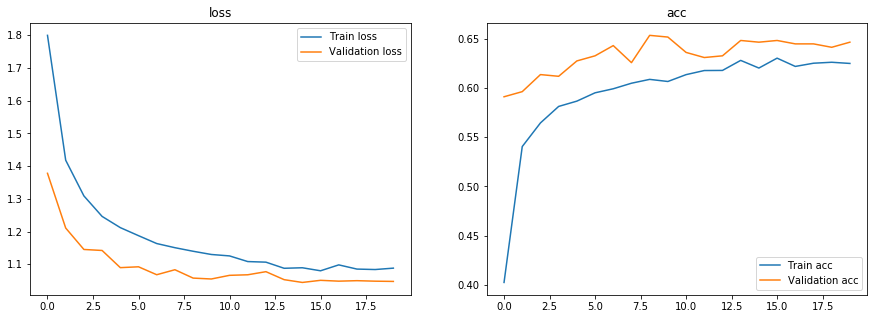

In [12]:
show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")